# Coco Assembly and Ribosome Collision

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##### Arpat

In [ ]:
temp_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/mouse"
data_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Data/sam_arpat"
script_path_infrastructure = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure"
import sys
sys.path.insert(0, '/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

disomes = [os.path.join(data_repo_dir, i) for i in ["SRR9715828.sam", "SRR9715826.sam"]]
monosomes = [os.path.join(data_repo_dir, i) for i in ["SRR1930189.sam", "SRR1930188.sam"]]

I = Infrastructre(temp_repo_dir,
                  ensembl_release=102,
                  organism="mus_musculus",
                  #include_gene3d=True,
                  verbose=True)

I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, monosomes, disomes, "sixtymers",
                                       riboseq_assign_to="best_transcript", riboseq_assign_at=-15,
                                       protein_genome_instance=I.protein_genome,
                                       gene_info_dictionary=I.gene_info,
                                       exclude_genes=I.exclude_genes, verbose=I.verbose,
                                       footprint_len_experiment=list(range(45,71)),  # From paper
                                       footprint_len_background=list(range(26, 36))  # From paper
                                       )

#### Bukau

In [2]:
temp_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/"
data_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Data/sam_bukau"
script_path_infrastructure = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure"
import sys
sys.path.insert(0, '/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

spt = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_TT1.sam", "Sixtymers_TT2.sam"]]
sps = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_Rep1.sam", "Sixtymers_Rep2.sam", "Sixtymers_NoPK.sam"]]

erb_serb = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
erb_total = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]
nac_serb = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
nac_total = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]

coco_d = [os.path.join(data_repo_dir, i) for i in ["Coco_Dis1.sam", "Coco_Dis2.sam"]]
coco_m = [os.path.join(data_repo_dir, i) for i in ["Coco_Mono1.sam", "Coco_Mono2.sam"]]

exclude_genes = ["ENSG00000160789"]

I = Infrastructre(temp_repo_dir,
                  exclude_genes=exclude_genes,
                  ensembl_release=102,
                  organism="homo_sapiens",
                  #include_gene3d=True,
                  verbose=True)
I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, spt, sps, "sixtymers",
                                        riboseq_assign_to="best_transcript", riboseq_assign_at="auto",
                                        protein_genome_instance=I.protein_genome,
                                        gene_info_dictionary=I.gene_info,
                                        exclude_genes=I.exclude_genes, verbose=I.verbose)
# Should be first to calculate, since multiprocessing is quite memory inefficient.
I.riboseq_coco = RiboSeqCoco(I.temp_repo_dir, coco_m, coco_d, "cocoassembly",
                             riboseq_assign_to="best_transcript", riboseq_assign_at=-15,
                             protein_genome_instance=I.protein_genome,
                             gene_info_dictionary=I.gene_info,
                             exclude_genes=I.exclude_genes, verbose=I.verbose)

/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.


[09/06/2021 18:28:20 CEST] Gene information dictionary is found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/gene_info_database.joblib


INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.cdna.all.fa.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.pep.all.fa.pickle


[09/06/2021 18:28:45 CEST] ProteinGenome found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/protein_genome_instance.joblib
[09/06/2021 18:28:54 CEST] RiboSeq assignment for sixtymers_background found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_sixtymers_background.joblib
[09/06/2021 18:28:58 CEST] RiboSeq assignment for sixtymers_experiment found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_sixtymers_experiment.joblib
[09/06/2021 18:29:04 CEST] RiboSeq assignment for cocoassembly_background found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_background.joblib
[09/06/2021 18:29:07 CEST] RiboSeq assignment for cocoassembly_experiment found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_experiment.joblib
Fitting calculations found for cocoassembly in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_fitting_c

In [3]:
def bootstrap(data, n=1000, func=np.mean, p=0.95):
    data = data[~np.isnan(data)]
    # Bootstrap is conducted by sampling with replacement
    sample_size = len(data)
    simulations = [func(np.random.choice(data, size=sample_size, replace=True)) for i in range(n)]
    low_ci = np.percentile(simulations, 100*(1-p)/2)
    high_ci = np.percentile(simulations, 100*(1-(1-p)/2))
    return (low_ci, high_ci)
def normalization(data1d):
    return (data1d - np.nanmin(data1d)) / (np.nanmax(data1d) - np.nanmin(data1d))
def confidence_interval_normal(metag, confidence=0.95):
    ci = np.empty((2, metag.shape[1]))
    for i in range(metag.shape[1]):
        data = metag[:, i]
        mean=np.nanmean(data)
        std=np.nanstd(data, ddof=1)
        size=np.sum(~np.isnan(data))
        alpha=1-confidence
        t_score=stats.t.isf(alpha/2,df=(size-1))
        ME=t_score*std/np.sqrt(size)
        lower_CI=mean-ME
        upper_CI=mean+ME
        ci[:,i] = np.array([lower_CI, upper_CI])
    return ci
def confidence_interval_poission(metag, confidence=0.95):
    # https://stats.stackexchange.com/questions/15371/how-to-calculate-a-confidence-level-for-a-poisson-distribution
    ci = np.empty((2, metag.shape[1]))
    for i in range(metag.shape[1]):
        data = metag[:, i]
        mean=np.nanmean(data)
        z=stats.norm.ppf(1-(1-confidence)/2)
        size=np.sum(~np.isnan(data))
        lower_CI=mean - z * np.sqrt(mean/size)
        upper_CI=mean + z * np.sqrt(mean/size)
        ci[:,i] = np.array([lower_CI, upper_CI])
    return ci

In [4]:
gene_lengths = {gene_id: I.riboseq_sixtymers.experiment.gene_lengths[gene_id] for gene_id in I.gene_list}
gene_collision = {gene_id: I.riboseq_sixtymers.stalling_peaks_inecik_3(gene_id, probability=0.010) for gene_id in I.gene_list}
print(f"Number of collision sites: {len([j for i in gene_collision for j in gene_collision[i]])}") # 35732

Number of collision sites: 34135


#### CocoOnset

Choose the one of following

In [5]:
gene_onset_raw = {gene_id: I.riboseq_coco.calculate_onset(gene_id) for gene_id in I.gene_list}
print(f"Gene count: {len(I.gene_list)}")
print(f"Genes does not fit CocoAssembly: {np.isnan(np.array(list(gene_onset_raw.values()))).sum()}")
print(f"Genes fit CocoAssembly: {len(I.gene_list) - np.isnan(np.array(list(gene_onset_raw.values()))).sum()}")

/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1982: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1981: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1977: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init


Gene count: 22524
Genes does not fit CocoAssembly: 15604
Genes fit CocoAssembly: 6920


In [6]:
pubdata = pd.read_excel(os.path.join(os.path.dirname(script_path_infrastructure), "matilde_kai_2021.xlsx"), header=1)
pubdata["High_conf"] = pubdata["High_conf"].replace(np.nan, False)
pubdata["Low_conf"] = pubdata["Low_conf"].replace(np.nan, False)
pubdata["Low_conf"] = pubdata["Low_conf"].astype(bool)
pubdata["High_conf"] = pubdata["High_conf"].astype(bool)
print(f"Data frame All: {pubdata.shape}")

Data frame All: (4130, 5)


In [7]:
# Get the gene names from the infrastrcture
gene_name_to_gene_id = dict()
for gene_id in I.gene_list:
    for gene_name in I.gene_info[gene_id].gene_names:
        gene_name_to_gene_id[gene_name] = gene_name_to_gene_id.get(gene_name, []) + [gene_id]

# Create an accurate mapping
toensembl = dict()
for gene_name in pubdata["Gene"]:
    if gene_name in gene_name_to_gene_id:
        toensembl[gene_name] = gene_name_to_gene_id[gene_name]
    else:
        for k in gene_name.split("-"):
            if k in gene_name_to_gene_id:
                toensembl[gene_name] = toensembl.get(gene_name, []) + gene_name_to_gene_id[k]
    #if gene_name in toensembl:
    #    toensembl[gene_name] = [gene_id for gene_id in toensembl[gene_name] if not np.isnan(gene_onset_raw[gene_id])]

In [8]:
onsetdf = list()
included_already = list()
for row_series in pubdata.iterrows():
    row = row_series[1].to_list()
    if row[0] in toensembl:
        ensemblid = toensembl[row[0]]
        for gene_id in ensemblid:
            included_already.append(gene_id)
            my_onset = gene_onset_raw[gene_id]
            new_row = [gene_id, row[0], my_onset, row[1] * 3, "High" if row[2] else "Low", gene_lengths[gene_id], row[4],
                       I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id),
                       I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)]
            onsetdf.append(new_row)
    else:
        new_row = [np.nan, row[0], np.nan, row[1] * 3, "High" if row[2] else "Low", np.nan, row[4],
                   np.nan, 
                   np.nan]
        onsetdf.append(new_row)
for gene_id in gene_onset_raw:
    if not np.isnan(gene_onset_raw[gene_id]) and gene_id not in included_already:
        my_onset = gene_onset_raw[gene_id]
        new_row = [gene_id, np.nan, my_onset, np.nan, "Extended", gene_lengths[gene_id], np.nan,
                       I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id),
                       I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)]
        onsetdf.append(new_row)
onsetdf = pd.DataFrame(onsetdf, columns = ["GeneID", "GeneName", "MyOnset", "PapersOnset", "Confidence", 
                         "GeneLength", "PaperTotalRPKM", "MySixtymersRPKM", "MyTotalRPKM"])
onsetdf.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  
0        0.121248       102.058374    89.765197  
1        0.023634        13.453680    20.600090  
2        0.005600         7.619262    10.523488  
3        0.061421        71.800416    65.873338  
4        0.031557        27.380521    25.648697

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


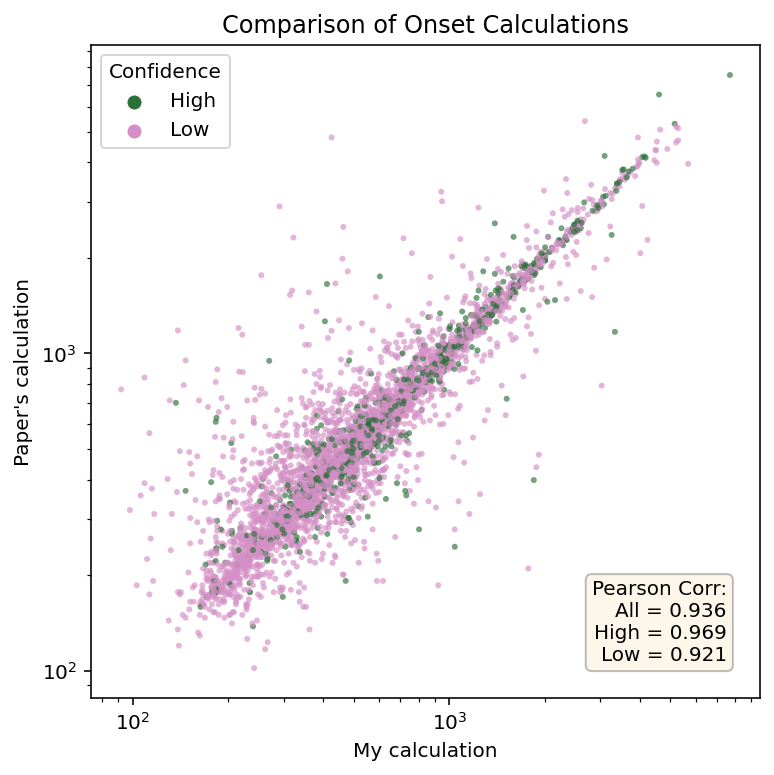

In [9]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))] # & (onsetdf["Confidence"] == "High")]
plt.figure(figsize=(6, 6))
sns.scatterplot(data=temp_df, x="MyOnset", y="PapersOnset", hue="Confidence", alpha=0.65,
                palette="cubehelix", linewidth=0, marker = ".", hue_order=["High", "Low"])

temp_r_high = temp_df[temp_df["Confidence"] == "High"]
r_high = stats.pearsonr(temp_r_high["MyOnset"], temp_r_high["PapersOnset"])[0]
temp_r_low = temp_df[temp_df["Confidence"] == "Low"]
r_low = stats.pearsonr(temp_r_low["MyOnset"], temp_r_low["PapersOnset"])[0]
r_all = stats.pearsonr(temp_df["MyOnset"], temp_df["PapersOnset"])[0]

plt.text(0.95, 0.05, "Pearson Corr:\nAll = %.3f\nHigh = %.3f\nLow = %.3f" % (r_all, r_high, r_low), 
            transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment="right", alpha=1,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))
plt.xlabel("My calculation")
plt.ylabel("Paper's calculation")
plt.title(f"Comparison of Onset Calculations")
plt.xscale("log")
plt.yscale("log")

In [10]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))][["GeneID", "MyOnset"]]
temp_df["MyOnset"] = temp_df["MyOnset"].astype(np.int16)
gene_onset = temp_df.set_index('GeneID').to_dict()["MyOnset"]
gene_onset.update({i: np.nan for i in I.gene_list if i not in gene_onset})

# Coco-assembly Onset and Collision Relationship

#### Ribosome colision signal enrichment around onset 

In [24]:
rpkm_threshold_for_sixtymers = 1

In [25]:
number_of_offset = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    if not np.isnan(ons) and rpkm_background > rpkm_threshold_for_sixtymers:
        number_of_offset += 1
number_of_offset

4085

In [26]:
flank = 400
metag = np.full((number_of_offset, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    if not np.isnan(ons) and rpkm_background > rpkm_threshold_for_sixtymers:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        normalized_sixtymers = exp_rpm_bs / rpkm_background
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = normalized_sixtymers[start_position: ons+flank]
        metag[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

4085

In [27]:
# RANDOM Onset
onset_gene = 25
metag_average = np.full((number_of_offset * onset_gene, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    if not np.isnan(ons) and rpkm_background > rpkm_threshold_for_sixtymers:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        normalized_sixtymers = exp_rpm_bs / rpkm_background
        for _ in range(onset_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            start_position = max(0, ons-flank)
            start_offset = -min(0, ons-flank)
            marr = normalized_sixtymers[start_position: ons+flank]
            metag_average[ind, start_offset: len(marr) + start_offset] = marr
            ind += 1
ind

102125

In [28]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[129, 135], [231, 240], [246, 436], [518, 607], [612, 724], [746, 750], [760, 767], [769, 793]]


In [29]:
kk = 0.95 
bootstrap_ci = confidence_interval_normal(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_normal(metag_average, confidence=1-((1-kk) / onset_gene))

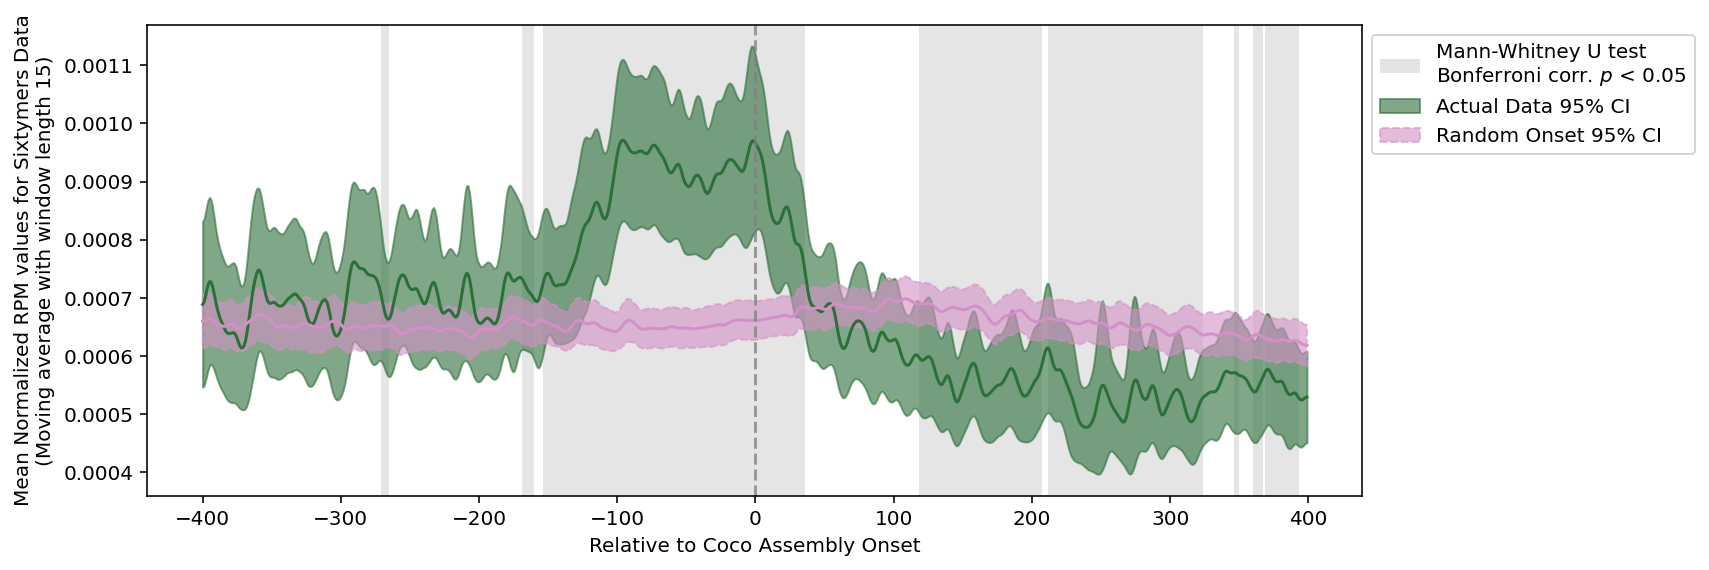

In [30]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))

plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.6, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.6, linestyle="--", label="Random Onset 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Coco Assembly Onset")
plt.ylabel("Mean Normalized RPM values for Sixtymers Data\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Ribosome colision peak enrichment around onset

In [31]:
flank = 200
metag = np.full((number_of_offset, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    col = gene_collision[gene_id]
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    if not np.isnan(ons) and rpkm_background > rpkm_threshold_for_sixtymers:
        arr = np.arange(ons - flank, ons + flank)
        marr = np.isin(arr, col).astype(float)
        marr[arr < 0] = np.nan
        marr[arr > gene_lengths[gene_id]] = np.nan
        assert len(marr) == flank * 2
        metag[ind] = marr
        ind += 1
ind

4085

In [32]:
# RANDOM Onset
onset_gene = 25
metag_average = np.full((number_of_offset * onset_gene, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    col = gene_collision[gene_id]
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    if not np.isnan(ons) and rpkm_background > rpkm_threshold_for_sixtymers:
        for _ in range(onset_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            arr = np.arange(ons - flank, ons + flank)
            marr = np.isin(arr, col).astype(float)
            marr[arr < 0] = np.nan
            marr[arr > gene_lengths[gene_id]] = np.nan
            assert len(marr) == flank * 2
            metag_average[ind] = marr
            ind += 1
ind

102125

In [33]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[98, 112], [116, 116], [118, 135], [138, 155], [170, 210], [347, 347]]


In [34]:
kk = 0.75 
bootstrap_ci = confidence_interval_poission(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_poission(metag_average, confidence=1-((1-kk) / onset_gene))

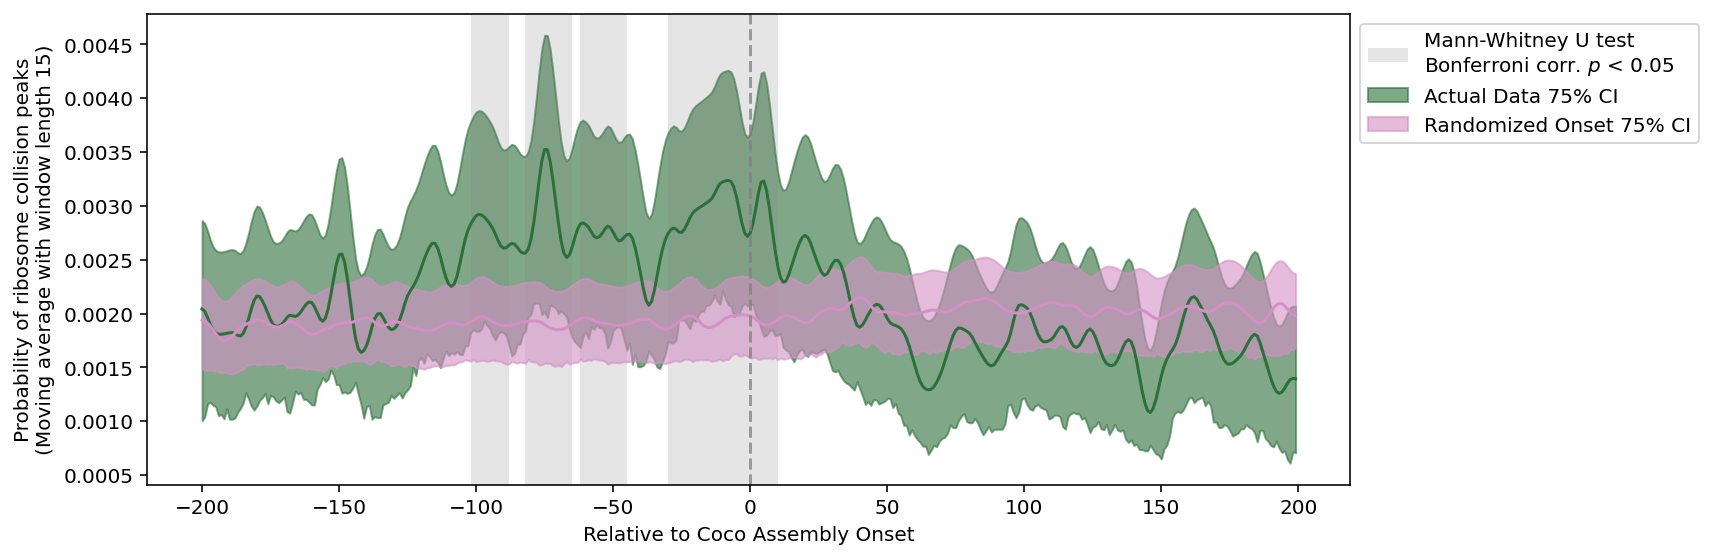

In [35]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))
a1 = smooth_array(np.nanmean(metag, axis=0), 15, "hanning")
a2 = smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning")

plt.plot(x_data, a1, alpha=1, color=palette[0])
plt.plot(x_data, a2, alpha=1, color=palette[1])
plt.fill_between(x_data, smooth_array(bootstrap_ci[0], 15, "flat"), smooth_array(bootstrap_ci[1], 15, "hanning"), 
                 alpha=0.6, color=palette[0], label="Actual Data 75% CI", zorder=0)
plt.fill_between(x_data,smooth_array(bootstrap_ci_random[0], 15, "flat"), smooth_array(bootstrap_ci_random[1], 15, "hanning"), 
                 alpha=0.6, color=palette[1], label="Randomized Onset 75% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")

plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Coco Assembly Onset")
plt.ylabel("Probability of ribosome collision peaks\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Why random onset cases are not horizontal line

In [11]:
data_plot = list()
for gene_id in I.gene_list:
    rpkm_bac = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    rpkm_exp = I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id)
    if rpkm_bac > 0.01 and rpkm_exp > 0.01:
        data_plot.append([gene_lengths[gene_id], rpkm_exp / rpkm_bac])
data_plot = np.array(data_plot).T
print(data_plot.shape)

(2, 13798)


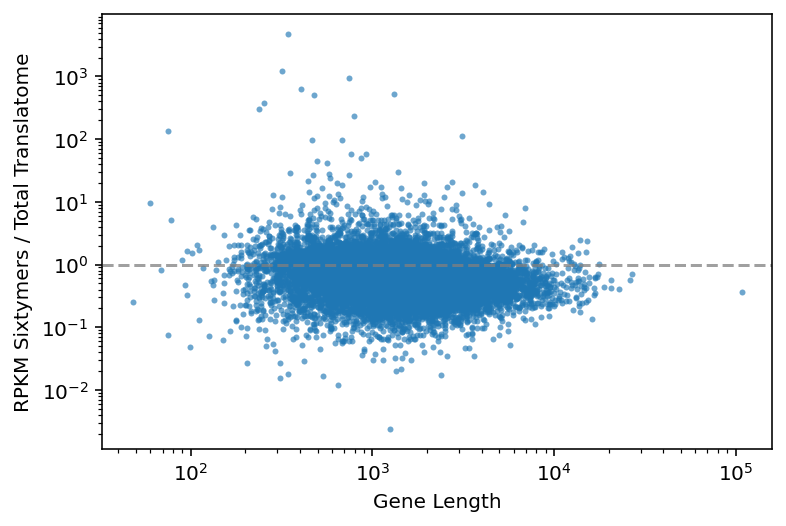

In [13]:
plt.scatter(data_plot[0], data_plot[1], linewidths=0, marker=".", alpha=0.65)
plt.axhline(1, color="gray", alpha=0.75, linestyle = "--")
plt.ylabel("RPKM Sixtymers / Total Translatome")
plt.xlabel("Gene Length")
plt.yscale("log")
plt.xscale("log")

Because the shorter genes tends to have more sixtymers / total translatome rpkm values. Since we normalize the sixtymers data with total translatome rpkm data, the values coming from shorter genes become more and more important. These short genes have impact on the middle points in the metagene profile, but not the edges. Edge average is therefore lower than the middle average in metagene profiles.

# Different Sigmoidal Curve Shapes

## Slope

In [11]:
slopes_temp = list()
for row_series in onsetdf.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = row_series[1]["MyOnset"]
    if not np.isnan(ons):
        ons = int(ons)
        curve_derivative = np.gradient(I.riboseq_coco.calculate_curve(gene_id))
        slopes_temp.append(curve_derivative[ons])
    else:
        slopes_temp.append(np.nan)
onsetdf["SlopeMyOnset"] = slopes_temp
onsetdf.head()

/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1982: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1977: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1981: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \


GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  
0        0.121248       102.058374    89.765197      0.005300  
1        0.023634        13.453680    20.600090      0.010595  
2        0.005600         7.619262    10.523488      0.011941  
3        0.061421        71.800416    65.873338      0.002370  
4        0.031557        27.380521    25.648697      0.000598

#### With Normalized Sixtymers Data

In [37]:
import skimage.measure
from astropy import convolution
sio = onsetdf[(~onsetdf.isna().any(axis=1))][["GeneID", "MyOnset", "SlopeMyOnset"]]
sio.sort_values(by=['SlopeMyOnset'], inplace=True)

In [38]:
flank = 600
rpkm_threshold_for_sixtymers = 0.001
the_matrix = np.full((sio.shape[0], flank*2), np.nan)
ind = 0
for gene_id in sio["GeneID"]:
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    ons = int(sio["MyOnset"][sio["GeneID"] == gene_id].unique())
    if rpkm_background > rpkm_threshold_for_sixtymers:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        normalized_sixtymers = exp_rpm_bs / rpkm_background
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = normalized_sixtymers[start_position: ons+flank]
        the_matrix[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
the_matrix = the_matrix.T

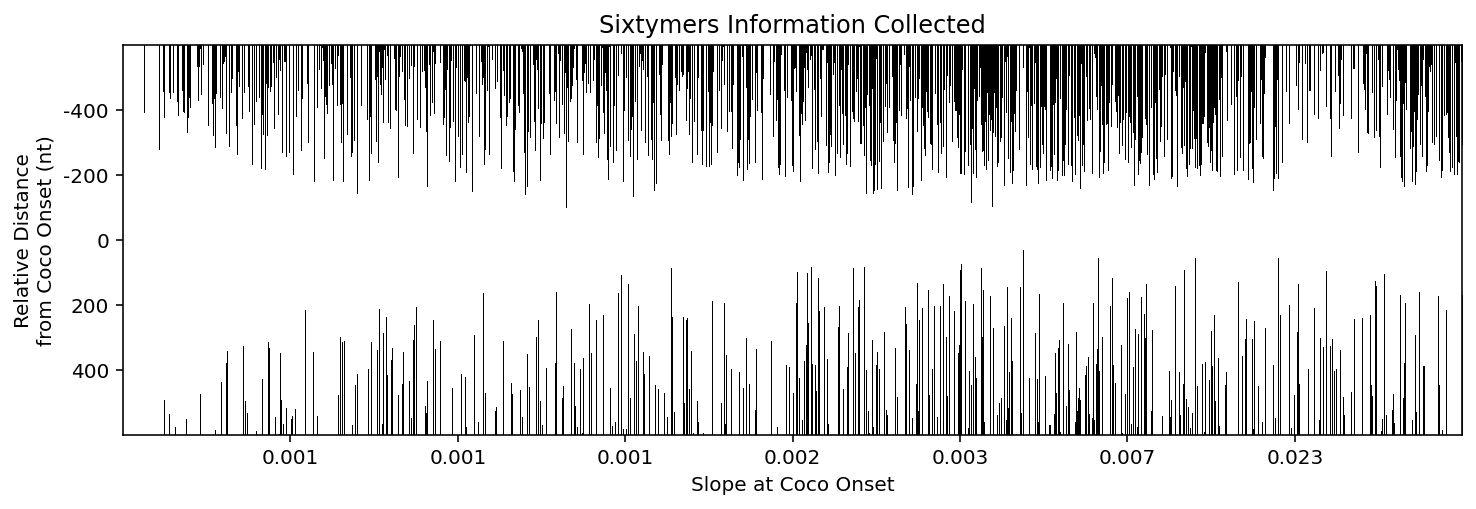

In [39]:
plt.figure(figsize=(12,12))
plt.imshow(~np.isnan(the_matrix), cmap='cubehelix', interpolation='nearest')

locs = np.linspace(0, the_matrix.shape[1], 9)[1:-1]
labels = ["%.3f" % (np.percentile(sio["SlopeMyOnset"], loc/the_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, the_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - the_matrix.shape[0]/2) / (the_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(the_matrix.shape[0] / 2, color="white", alpha=0.25, linestyle = "--")
plt.xlabel("Slope at Coco Onset")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Information Collected")
plt.show()

In [40]:
krnl = 17
a_matrix = skimage.measure.block_reduce(the_matrix, (4,4), np.nanmean)
a_matrix = convolution.convolve(a_matrix, np.ones((krnl, krnl)))
print(the_matrix.shape)
print(a_matrix.shape)

/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/skimage/measure/block.py:87: RuntimeWarning: Mean of empty slice
  **func_kwargs)


(1200, 4121)
(300, 1031)


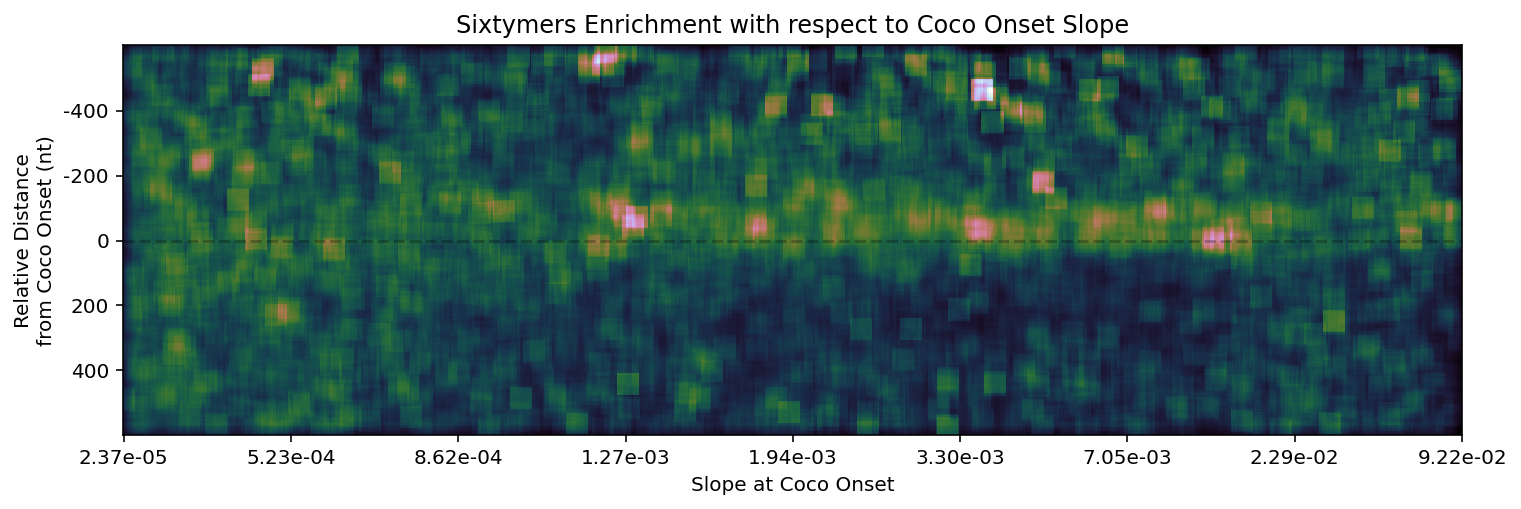

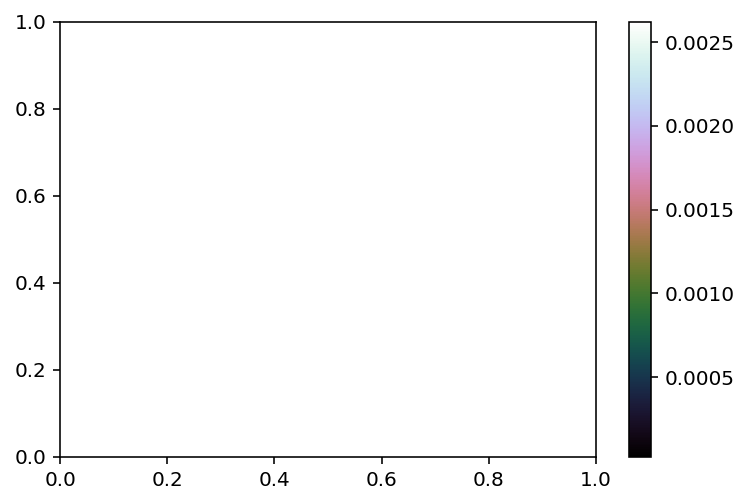

In [41]:
plt.figure(figsize=(12,12))
im = plt.imshow(a_matrix, cmap='cubehelix', interpolation='nearest')
np.percentile(sio["SlopeMyOnset"], 0/a_matrix.shape[1] * 100)
    
locs = np.linspace(0, a_matrix.shape[1], 9)
labels = ["%.2e" % (np.percentile(sio["SlopeMyOnset"], loc/a_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, a_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - a_matrix.shape[0]/2) / (a_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(a_matrix.shape[0] / 2, color="black", alpha=0.25, linestyle = "--")

plt.xlabel("Slope at Coco Onset")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Enrichment with respect to Coco Onset Slope")
plt.show()

plt.colorbar(im)
plt.show()

In [12]:
f1, f2 = 1.11e-3, 2.29e-2
print(f"Range: {f1, f2}")

Range: (0.00111, 0.0229)


In [13]:
lst = list()
for i in onsetdf["SlopeMyOnset"]:
    if pd.isna(i):
        lst.append(np.nan)
    elif i > f2:
        lst.append(3)
    elif i > f1:
        lst.append(2)
    else:
        lst.append(1)
onsetdf["SlopeClass"] = lst

In [55]:
narrawons = onsetdf[(~onsetdf.isna().any(axis=1))]
tbl = list()
for m_class in [1, 2, 3]:
    for o_conf in ["High", "Low"]:
        filt_temp = narrawons[(narrawons["Confidence"] == o_conf) & (narrawons["SlopeClass"] == m_class)]
        tbl.append(filt_temp.shape[0])
        #print(f"Class-{m_class}, Conf-{o_conf} {filt_temp.shape[0]}")
tbl = pd.DataFrame(np.array(tbl).reshape(3,2), columns = ["High", "Low"], index=[1,2,3])
tbl

High   Low
1   302  1067
2   479  1759
3    49   465

In [56]:
chi_test = stats.chi2_contingency(tbl)
print(f"Chi-square test of independence (p-value): {chi_test[1]}")
print(f"Chi-square test of independence (expected-freq):\n{chi_test[3]}")

print(f"\nChi-square test of independence exluding class 3(p-value): {stats.chi2_contingency(tbl.iloc[:2,:])[1]}")
print("Therefore, class 3 has non independent frequency.")

Chi-square test of independence (p-value): 1.0703644649379393e-09
Chi-square test of independence (expected-freq):
[[ 275.72676535 1093.27323465]
 [ 450.74981801 1787.25018199]
 [ 103.52341665  410.47658335]]

Chi-square test of independence exluding class 3(p-value): 0.672188388877605
Therefore, class 3 has non independent frequency.


In [57]:
m_close = list()
m_count = list()
for ind, row_series in narrawons.iterrows():
    col = gene_collision[row_series["GeneID"]]
    ons = int(row_series["MyOnset"])
    closest_peak = (col-ons)[np.argmin(np.abs(col-ons))] if len(col) > 0 else np.nan
    closest_peak = closest_peak if closest_peak != 0 else 1
    m_close.append(closest_peak)
    m_count.append(len(col))

m_class = np.ones(narrawons.shape[0])
m_class[narrawons["SlopeMyOnset"] > f1] += 1
m_class[narrawons["SlopeMyOnset"] > f2] += 1

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    narrawons["ClosestPeakDistance"] = m_close
    narrawons["ClosestPeakDistanceAbsolute"] = np.abs(m_close)
    narrawons["PeakCount"] = m_count
    narrawons["SlopeClass"] = m_class.astype(int)
narrawons.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  HeightAssembly  \
0        0.121248       102.058374    89.765197      0.005300        0.497321   
1        0.023634        13.453680    20.600090      0.010595        0.556481   
2        0.005600         7.619262    10.523488      0.011941        0.427146   
3        0.061421        71.800416    65.873338      0.002370        0.283736   
4        0.031557        27.380521    25.648697      0.000598        0.389167   

   WidthAssembly  SlopeClass  ClosestPeakDistance  \
0      93.833881           2                 15.0   
1      52.523687           2                382.0   
2      35.771692           2                -20.0   
3     119.731143           2                -16.0   
4     650.791953           1                -71.0   

   ClosestPeakDistanceAbsolute  PeakCount  
0                         15.0          9  
1                        382.0          2  
2                         20.0          3  
3                         16.0          4  
4                         71.0          8

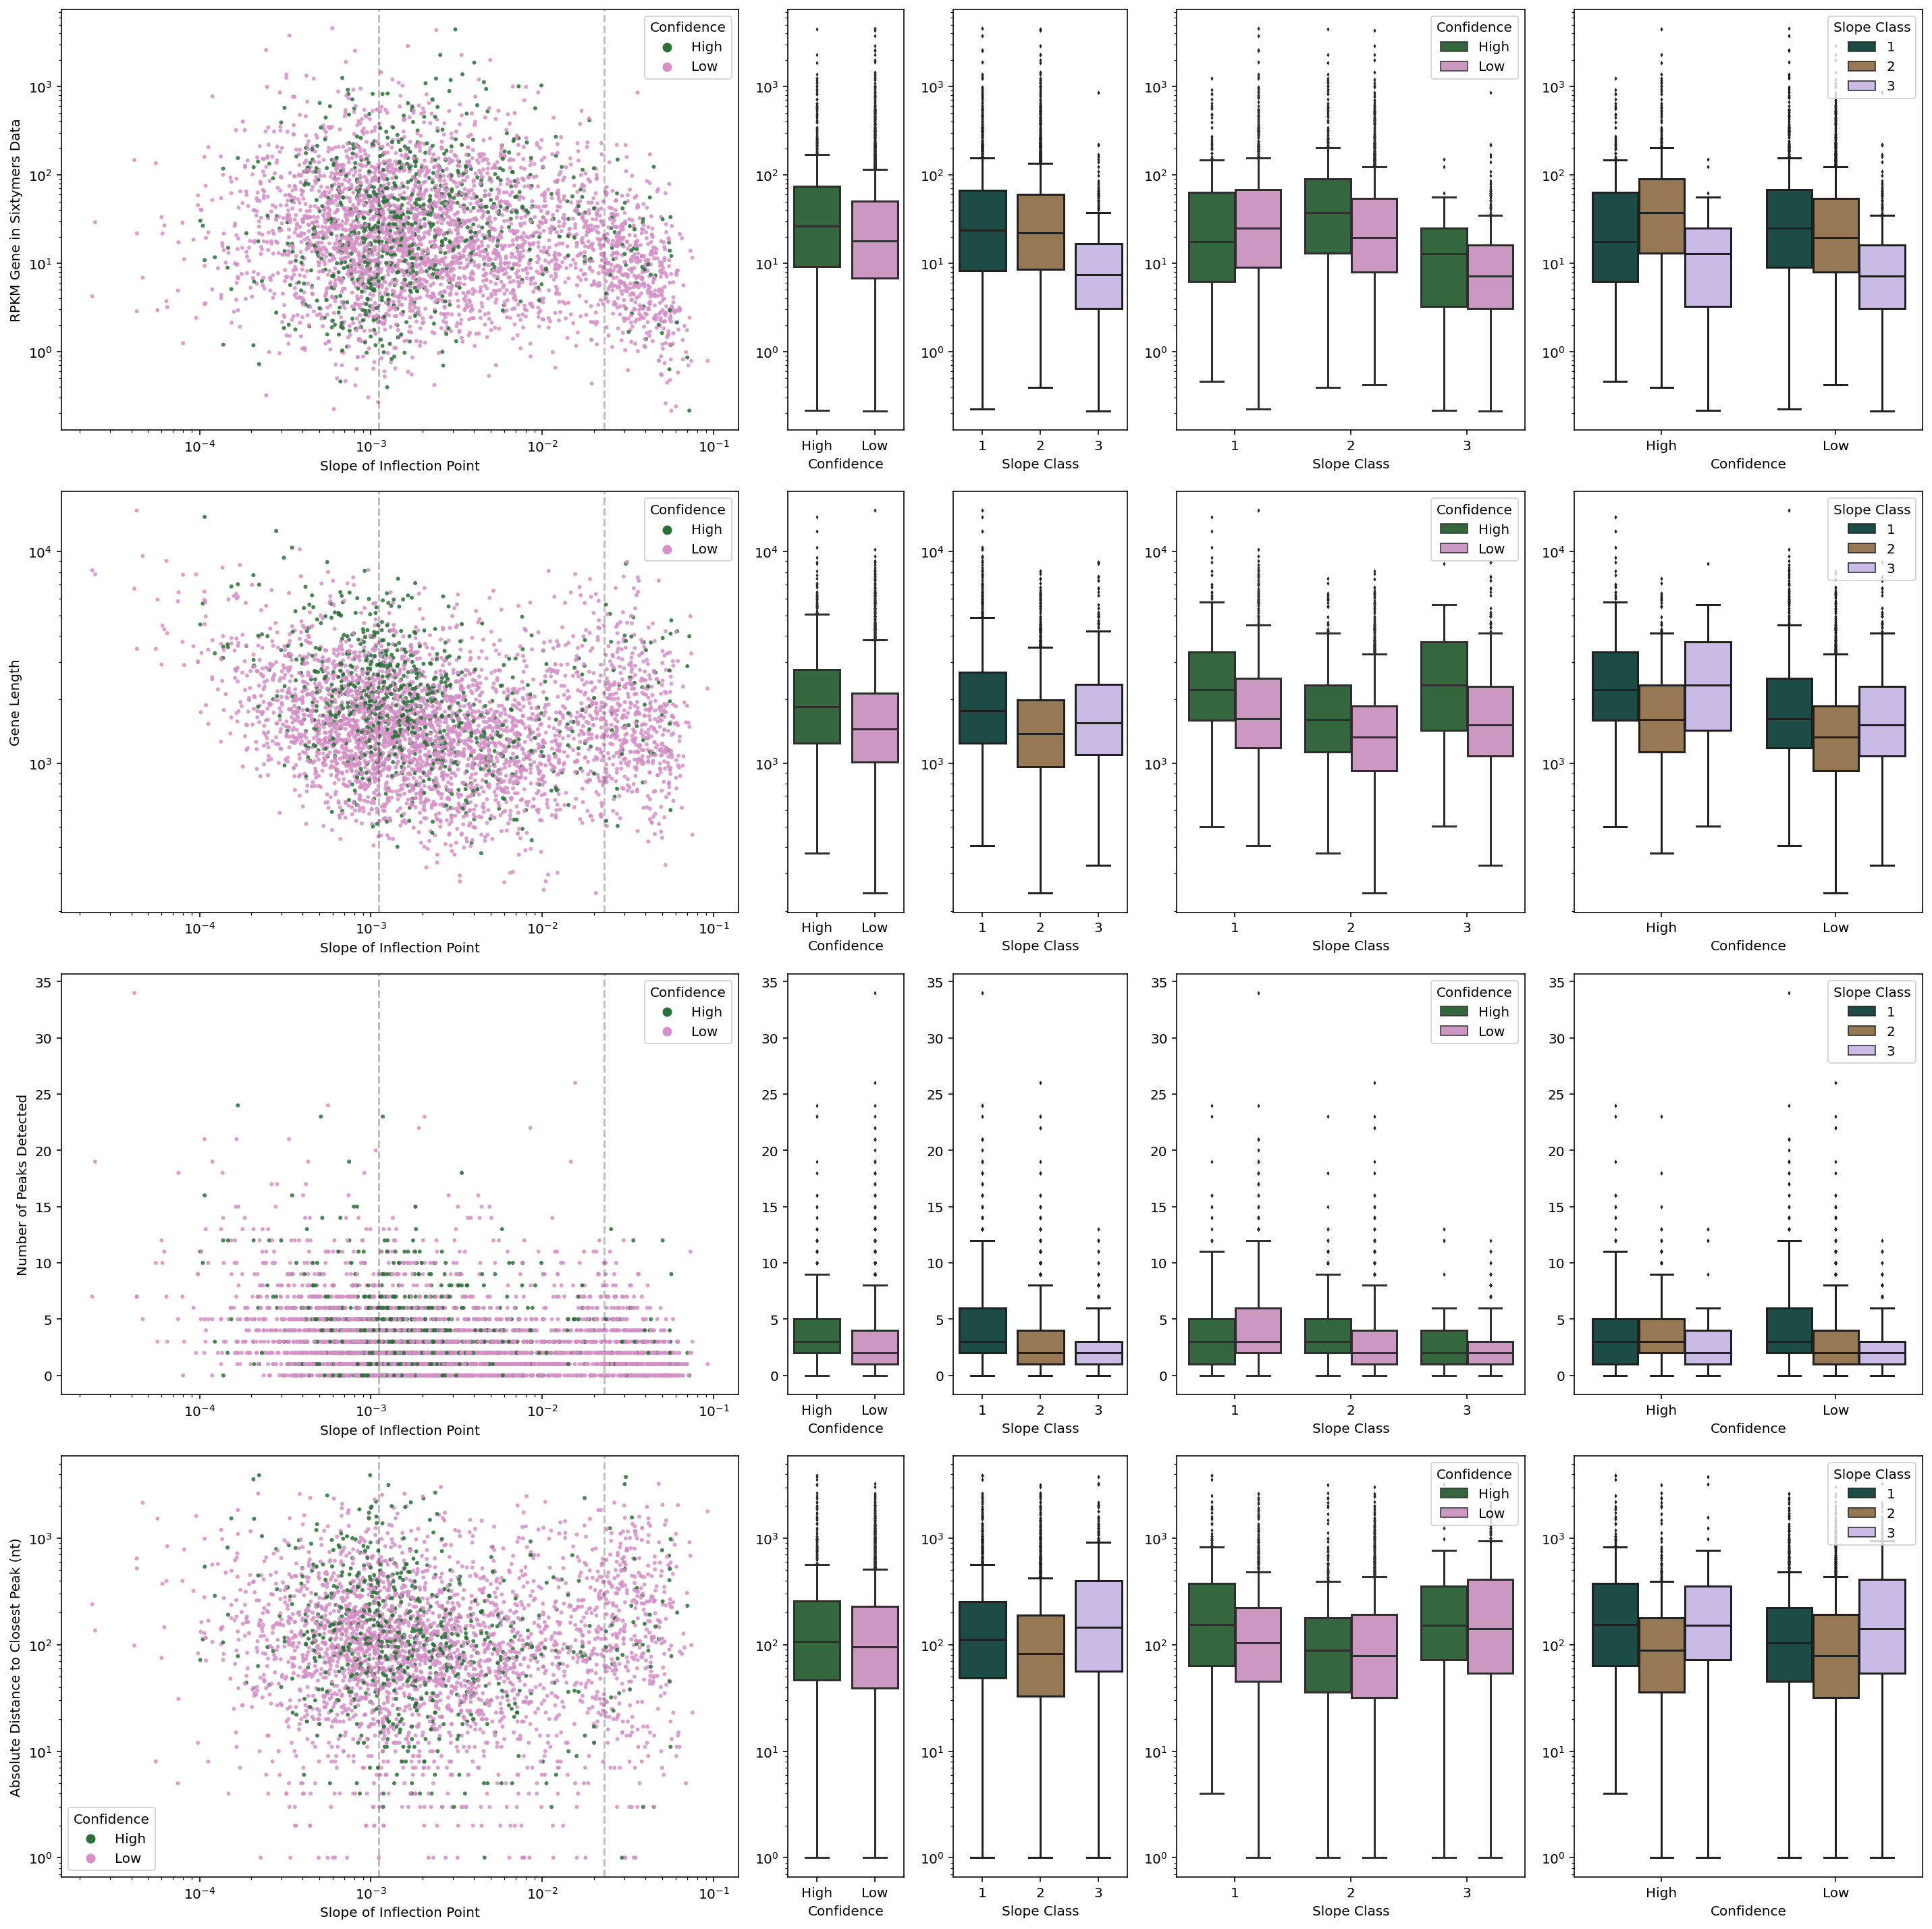

In [58]:
fig, ax = plt.subplots(4, 5, figsize=[4*(5), 5*(4)], gridspec_kw={'width_ratios': [1.75, 0.3, 0.45, 0.9, 0.9]})

for i, y_data, y_label, y_log, x_log in [
    [0, "MySixtymersRPKM", "RPKM Gene in Sixtymers Data", True, True],
    [1, "GeneLength", "Gene Length", True, True],
    [2, "PeakCount", "Number of Peaks Detected", False, True],
    [3, "ClosestPeakDistanceAbsolute", "Absolute Distance to Closest Peak (nt)", True, True],
]:

    sns.scatterplot(data=narrawons, x="SlopeMyOnset", y=y_data, 
                    hue="Confidence", hue_order=["High", "Low"], ax=ax[i,0], alpha=0.85, palette="cubehelix", linewidth=0, marker = ".")
    ax[i,0].axvline(f1, color="black", alpha=0.25, linestyle = "--")
    ax[i,0].axvline(f2, color="black", alpha=0.25, linestyle = "--")
    if y_log: ax[i,0].set_yscale("log")
    if x_log: ax[i,0].set_xscale("log")
    ax[i,0].set_xlabel("Slope of Inflection Point")
    ax[i,0].set_ylabel(y_label)
    #
    sns.boxplot(data=narrawons, x="Confidence", y=y_data, order=["High", "Low"],
                ax=ax[i,1], fliersize=1, palette="cubehelix")
    if y_log: ax[i,1].set_yscale("log")
    ax[i,1].set_xlabel("Confidence")
    ax[i,1].set_ylabel("")
    #
    sns.boxplot(data=narrawons, x="SlopeClass", y=y_data, order=[1, 2, 3],
                ax=ax[i,2], fliersize=1, palette="cubehelix")
    if y_log: ax[i,2].set_yscale("log")
    ax[i,2].set_xlabel("Slope Class")
    ax[i,2].set_ylabel("")
    #
    sns.boxplot(data=narrawons, x="SlopeClass", y=y_data, hue="Confidence", order=[1, 2, 3], hue_order=["High", "Low"], 
                ax=ax[i,3], fliersize=1, palette="cubehelix")
    if y_log: ax[i,3].set_yscale("log")
    ax[i,3].set_xlabel("Slope Class")
    ax[i,3].set_ylabel("")
    ax[i,3].legend(title="Confidence", loc="upper right")
    #
    sns.boxplot(data=narrawons, x="Confidence", y=y_data, hue="SlopeClass", order=["High", "Low"], hue_order=[1,2,3], 
                ax=ax[i,4], fliersize=1, palette="cubehelix")
    if y_log: ax[i,4].set_yscale("log")
    ax[i,4].set_xlabel("Confidence")
    ax[i,4].set_ylabel("")
    ax[i,4].legend(title="Slope Class",loc="upper right")
    
plt.tight_layout()
plt.show()

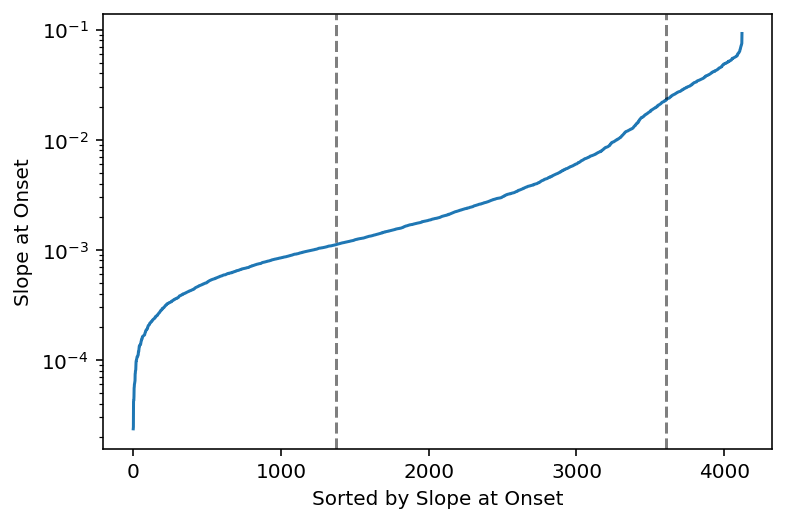

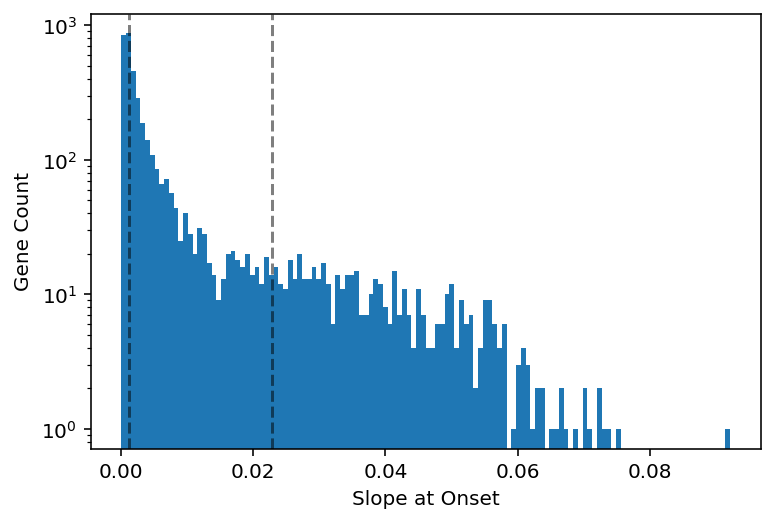

In [59]:
k = np.sort(narrawons["SlopeMyOnset"])
m1 = np.where(k > f1)[0][0]
m2 = np.where(k > f2)[0][0]

plt.plot(k)
plt.axvline(m1, color="black", alpha=0.5, linestyle = "--")
plt.axvline(m2, color="black", alpha=0.5, linestyle = "--")
plt.yscale("log")
plt.ylabel("Slope at Onset")
plt.xlabel("Sorted by Slope at Onset")
plt.show()

plt.hist(k, bins=128)
plt.yscale("log")
plt.axvline(f1, color="black", alpha=0.5, linestyle = "--")
plt.axvline(f2, color="black", alpha=0.5, linestyle = "--")
plt.ylabel("Gene Count")
plt.xlabel("Slope at Onset")
plt.show()

## Height

In [14]:
height_temp = list()
width_temp = list()
for row_series in onsetdf.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = row_series[1]["MyOnset"]
    if not np.isnan(ons):
        ons = int(ons)
        sgnl = I.riboseq_coco.calculate_curve(gene_id)
        drvt = np.gradient(sgnl)
        m = drvt[ons]
        karsi = (sgnl[ons] - sgnl[0]) * 2
        height_temp.append(karsi)
        width_temp.append(karsi / m)
    else:
        height_temp.append(np.nan)
        width_temp.append(np.nan)
onsetdf["HeightAssembly"] = height_temp
onsetdf["WidthAssembly"] = width_temp
onsetdf.head()

/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1982: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1977: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1981: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \


GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  SlopeClass  \
0        0.121248       102.058374    89.765197      0.005300         2.0   
1        0.023634        13.453680    20.600090      0.010595         2.0   
2        0.005600         7.619262    10.523488      0.011941         2.0   
3        0.061421        71.800416    65.873338      0.002370         2.0   
4        0.031557        27.380521    25.648697      0.000598         1.0   

   HeightAssembly  WidthAssembly  
0        0.497321      93.833881  
1        0.556481      52.523687  
2        0.427146      35.771692  
3        0.283736     119.731143  
4        0.389167     650.791953

#### With Normalized Sixtymers Data

In [61]:
import skimage.measure
from astropy import convolution
sioh = onsetdf[(~onsetdf.isna().any(axis=1))][["GeneID", "MyOnset", "HeightAssembly"]]
sioh.sort_values(by=['HeightAssembly'], inplace=True)

In [62]:
flank = 600
rpkm_threshold_for_sixtymers = 0.001
the_matrix = np.full((sioh.shape[0], flank*2), np.nan)
ind = 0
for gene_id in sioh["GeneID"]:
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    ons = int(sioh["MyOnset"][sioh["GeneID"] == gene_id].unique())
    if rpkm_background > rpkm_threshold_for_sixtymers:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        normalized_sixtymers = exp_rpm_bs / rpkm_background
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = normalized_sixtymers[start_position: ons+flank]
        the_matrix[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
the_matrix = the_matrix.T

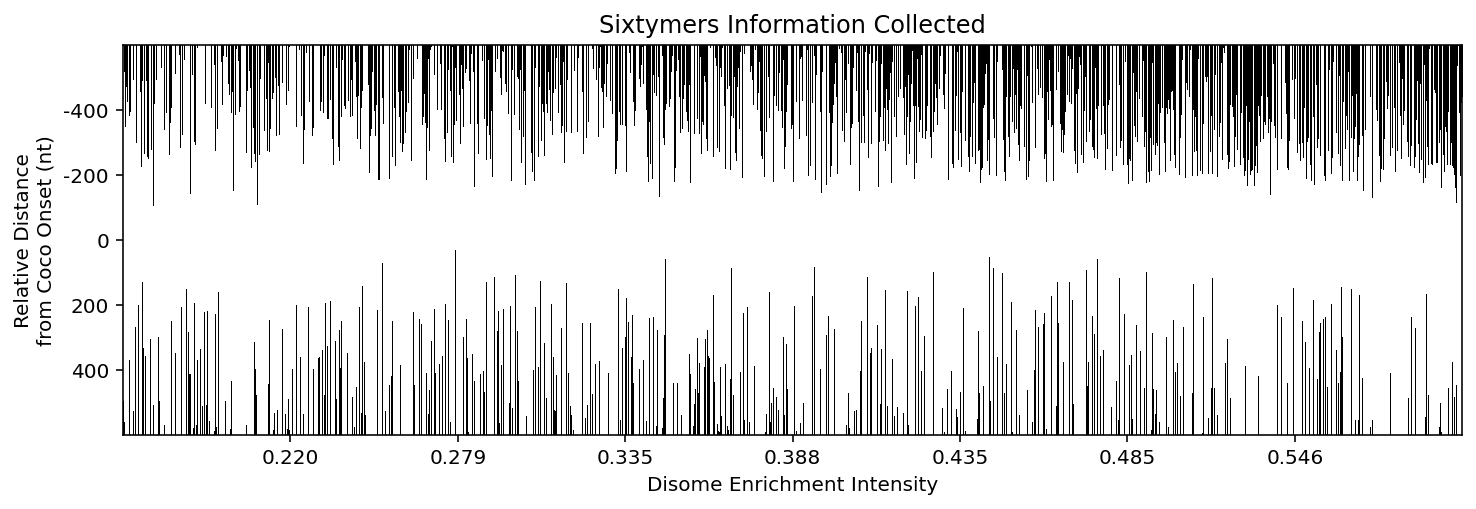

In [63]:
plt.figure(figsize=(12,12))
plt.imshow(~np.isnan(the_matrix), cmap='cubehelix', interpolation='nearest')

locs = np.linspace(0, the_matrix.shape[1], 9)[1:-1]
labels = ["%.3f" % (np.percentile(sioh["HeightAssembly"], loc/the_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, the_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - the_matrix.shape[0]/2) / (the_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(the_matrix.shape[0] / 2, color="white", alpha=0.25, linestyle = "--")
plt.xlabel("Disome Enrichment Intensity")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Information Collected")
plt.show()

In [64]:
krnl = 15
a_matrix = skimage.measure.block_reduce(the_matrix, (4,4), np.nanmean)
a_matrix = convolution.convolve(a_matrix, np.ones((krnl, krnl)))
print(the_matrix.shape)
print(a_matrix.shape)

/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/skimage/measure/block.py:87: RuntimeWarning: Mean of empty slice
  **func_kwargs)


(1200, 4121)
(300, 1031)


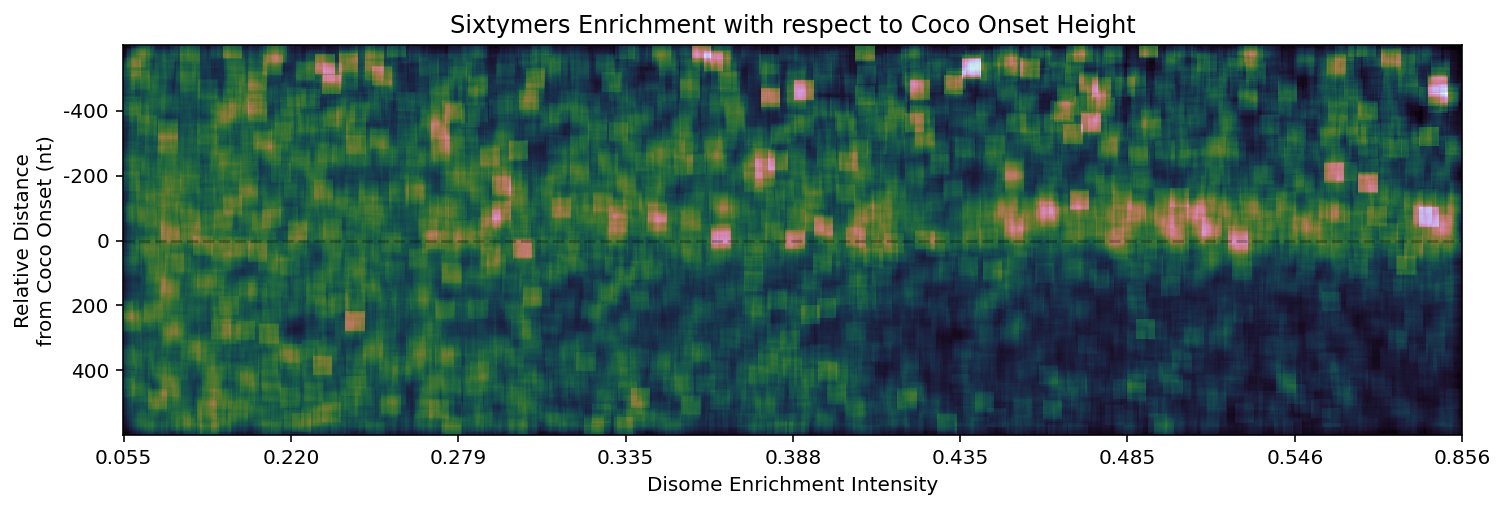

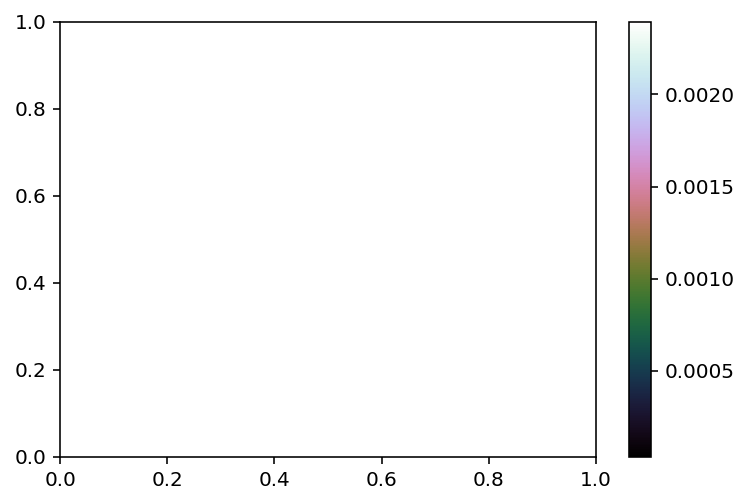

In [65]:
plt.figure(figsize=(12,12))
im = plt.imshow(a_matrix, cmap='cubehelix', interpolation='nearest')
np.percentile(sioh["HeightAssembly"], 0/a_matrix.shape[1] * 100)
    
locs = np.linspace(0, a_matrix.shape[1], 9)
labels = ["%.3f" % (np.percentile(sioh["HeightAssembly"], loc/a_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, a_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - a_matrix.shape[0]/2) / (a_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(a_matrix.shape[0] / 2, color="black", alpha=0.25, linestyle = "--")

plt.xlabel("Disome Enrichment Intensity")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Enrichment with respect to Coco Onset Height")
plt.show()

plt.colorbar(im)
plt.show()

In [66]:
narrawons = onsetdf[(~onsetdf.isna().any(axis=1))]

m_close = list()
m_count = list()
for ind, row_series in narrawons.iterrows():
    col = gene_collision[row_series["GeneID"]]
    ons = int(row_series["MyOnset"])
    closest_peak = (col-ons)[np.argmin(np.abs(col-ons))] if len(col) > 0 else np.nan
    closest_peak = closest_peak if closest_peak != 0 else 1
    m_close.append(closest_peak)
    m_count.append(len(col))

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    narrawons["ClosestPeakDistance"] = m_close
    narrawons["ClosestPeakDistanceAbsolute"] = np.abs(m_close)
    narrawons["PeakCount"] = m_count
narrawons.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  HeightAssembly  \
0        0.121248       102.058374    89.765197      0.005300        0.497321   
1        0.023634        13.453680    20.600090      0.010595        0.556481   
2        0.005600         7.619262    10.523488      0.011941        0.427146   
3        0.061421        71.800416    65.873338      0.002370        0.283736   
4        0.031557        27.380521    25.648697      0.000598        0.389167   

   WidthAssembly  SlopeClass  ClosestPeakDistance  \
0      93.833881         2.0                 15.0   
1      52.523687         2.0                382.0   
2      35.771692         2.0                -20.0   
3     119.731143         2.0                -16.0   
4     650.791953         1.0                -71.0   

   ClosestPeakDistanceAbsolute  PeakCount  
0                         15.0          9  
1                        382.0          2  
2                         20.0          3  
3                         16.0          4  
4                         71.0          8

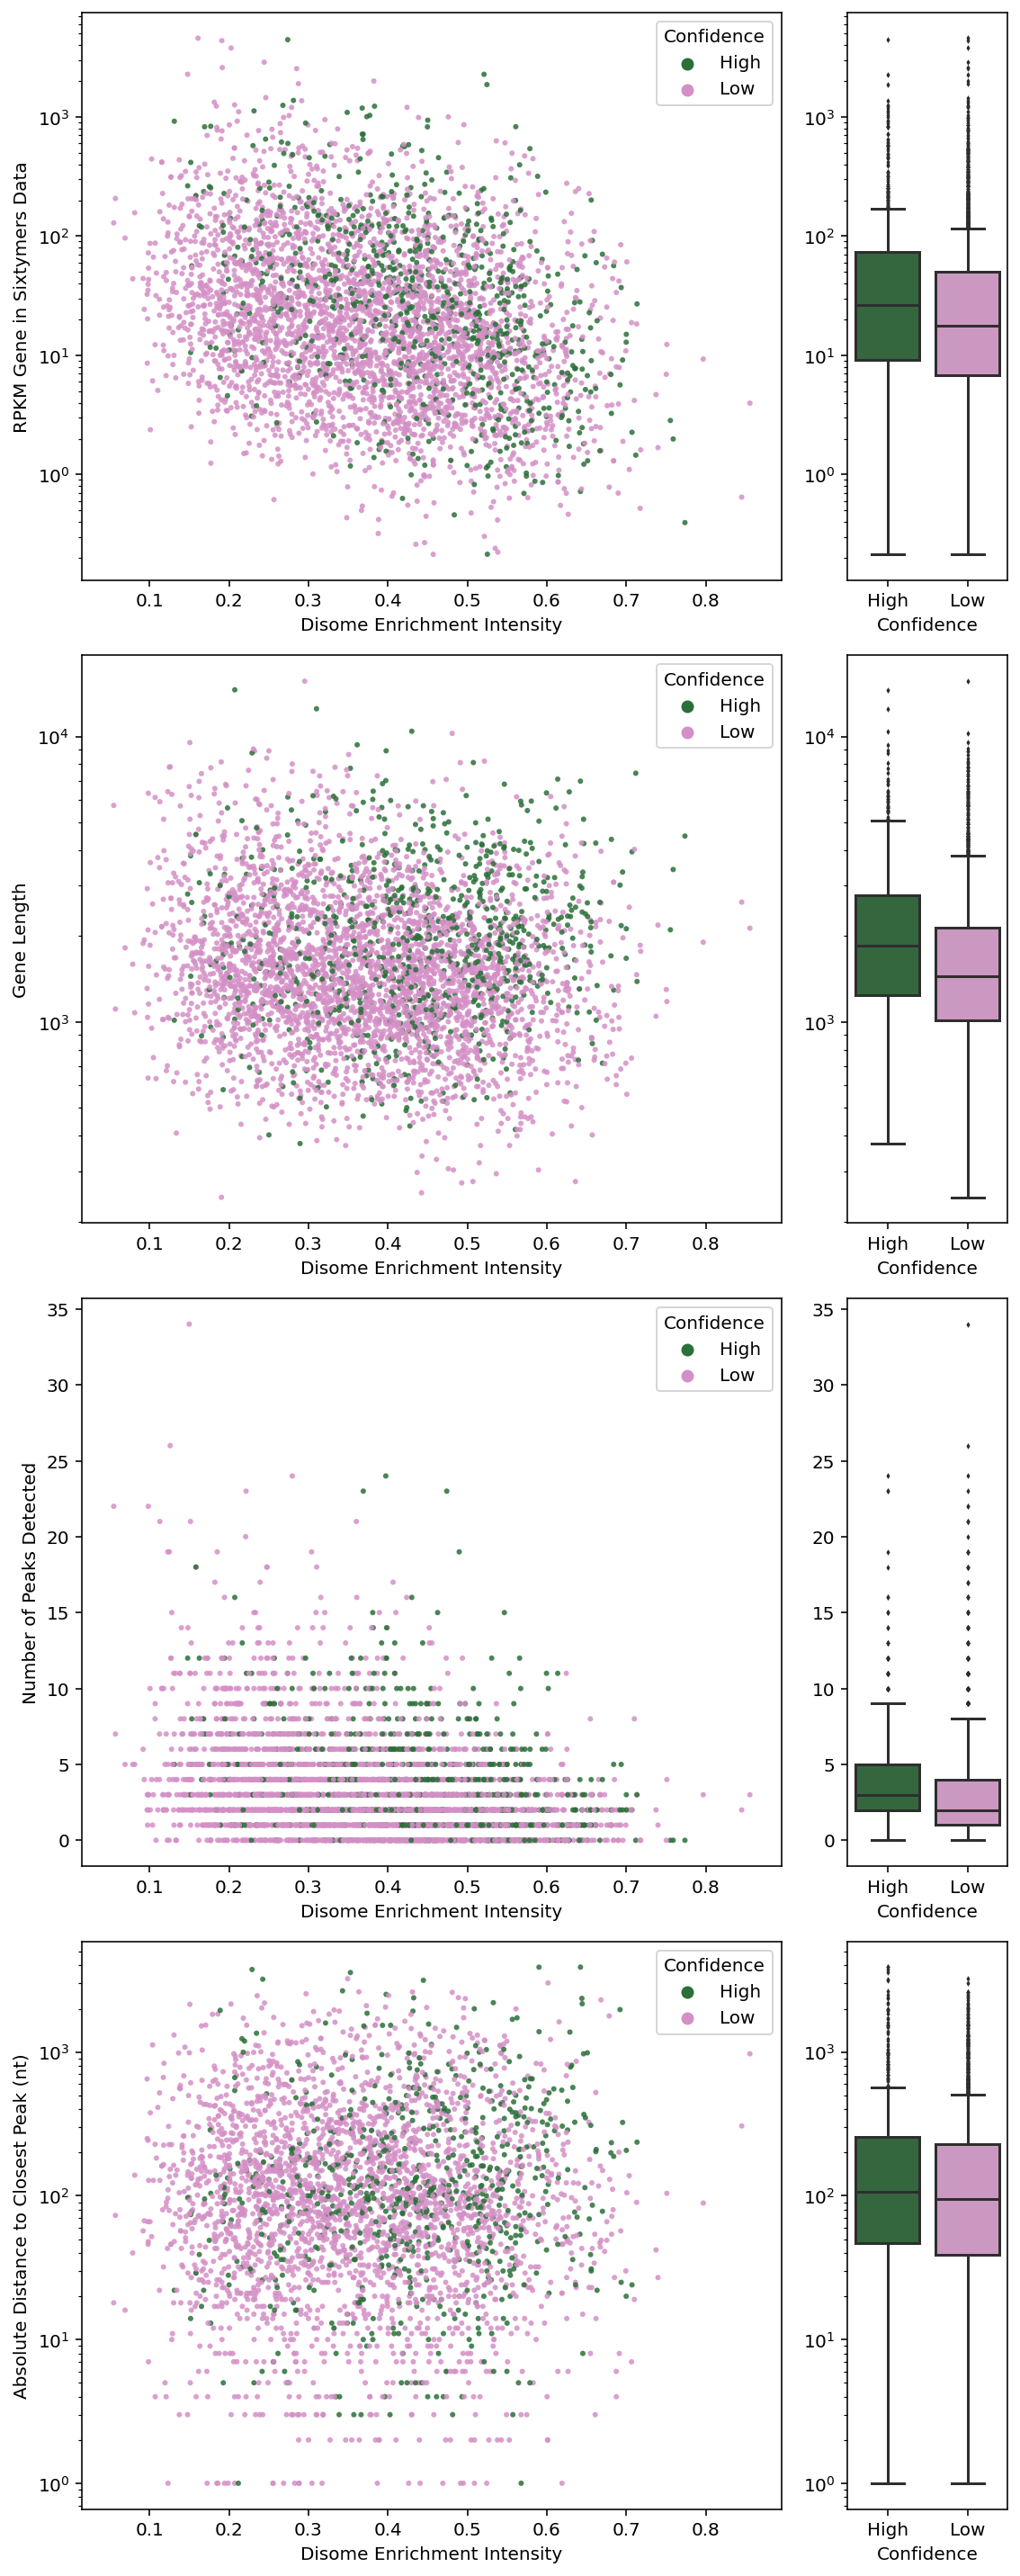

In [67]:
fig, ax = plt.subplots(4, 2, figsize=[4*(2), 5*(4)], gridspec_kw={'width_ratios': [1.75, 0.4]})

for i, y_data, y_label, y_log, x_log in [
    [0, "MySixtymersRPKM", "RPKM Gene in Sixtymers Data", True, False],
    [1, "GeneLength", "Gene Length", True, False],
    [2, "PeakCount", "Number of Peaks Detected", False, False],
    [3, "ClosestPeakDistanceAbsolute", "Absolute Distance to Closest Peak (nt)", True, False],
]:

    sns.scatterplot(data=narrawons, x="HeightAssembly", y=y_data, 
                    hue="Confidence", hue_order=["High", "Low"], ax=ax[i,0], alpha=0.85, palette="cubehelix", linewidth=0, marker = ".")
    if y_log: ax[i,0].set_yscale("log")
    if x_log: ax[i,0].set_xscale("log")
    ax[i,0].set_xlabel("Disome Enrichment Intensity")
    ax[i,0].set_ylabel(y_label)
    #
    sns.boxplot(data=narrawons, x="Confidence", y=y_data, order=["High", "Low"],
                ax=ax[i,1], fliersize=1, palette="cubehelix")
    if y_log: ax[i,1].set_yscale("log")
    ax[i,1].set_xlabel("Confidence")
    ax[i,1].set_ylabel("")
    
plt.tight_layout()
plt.show()

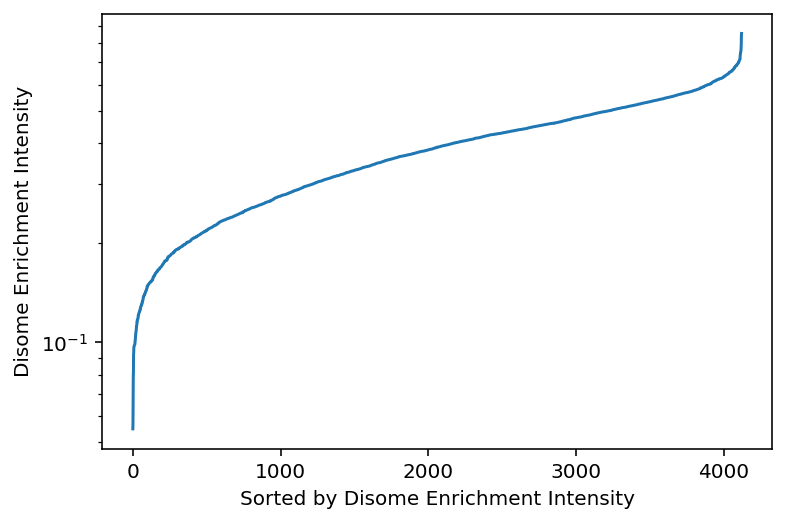

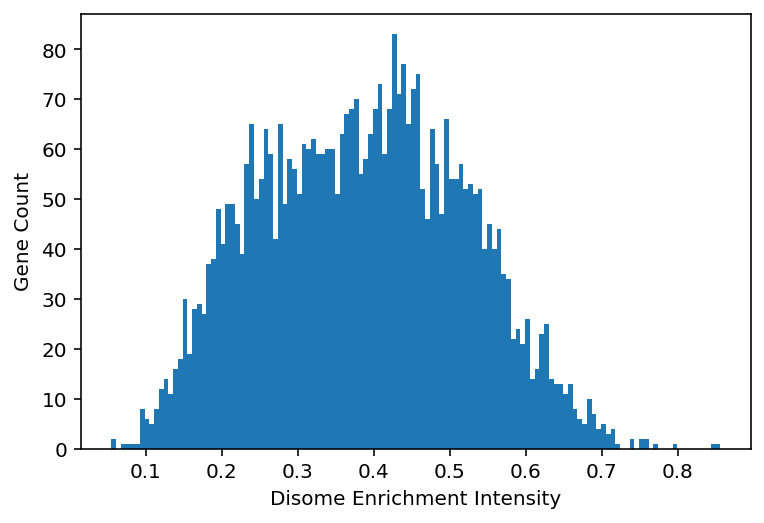

In [68]:
k = np.sort(narrawons["HeightAssembly"])

plt.plot(k)
plt.yscale("log")
plt.ylabel("Disome Enrichment Intensity")
plt.xlabel("Sorted by Disome Enrichment Intensity")
plt.show()

plt.hist(k, bins=128)
#plt.yscale("log")
plt.ylabel("Gene Count")
plt.xlabel("Disome Enrichment Intensity")
plt.show()

## Monosome Depletion

In [15]:
def find_max(the_arr):
    the_arr = list(the_arr)
    while the_arr:
        max_point = max(the_arr)
        last_point = the_arr.pop(-1)
        if max_point != last_point:
            return the_arr.index(max_point)
    return 0
def helper(p_ind, p_i, p_j, p_y_mid):
    return p_ind if abs(p_i - p_y_mid) < abs(p_j - p_y_mid) else p_ind + 1
def find_lg(the_arr, arr_max):
    if len(the_arr) == 0:
        raise AssertionError("Unexpected!")
    arr_stride = np.lib.stride_tricks.as_strided(the_arr, shape=(len(the_arr), 2), strides=(the_arr.strides + the_arr.strides))
    # last element is just bullshit
    y_mid = (arr_max + the_arr.min()) / 2
    x_mid = list(set([helper(ind, i, j, y_mid) for ind, (j, i) in enumerate(arr_stride[:-1]) if i <= y_mid <= j]))
    assert len(x_mid) != 0, f"Type 0 error in find_onset: {gene_id}"
    assert len(x_mid) == 1, f"Type 1 error in find_onset: {gene_id}"
    return x_mid[0]

mondep_lg_temp = list()
for row_series in onsetdf.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = row_series[1]["MyOnset"]
    if not np.isnan(ons):
        sigmoid_type = I.riboseq_coco.best_model[gene_id]["winner_model"]
        glength = I.riboseq_coco.experiment.gene_lengths[gene_id]
        if sigmoid_type == "ssig":
            mondep_lg_temp.append(glength)
        elif sigmoid_type == "dsig":
            # from infrastructure
            arr = I.riboseq_coco.calculate_curve(gene_id, model_name="dsig")
            marr = smooth_array(np.round(arr, 2), window_len=15, window="hanning")  # smooth and round
            derivative = np.gradient(marr)
            descending = np.sum(derivative < 0)
            ascending = np.sum(derivative > 0)
            if descending != 0 and ascending == 0:
                mondep_lg_temp.append(np.nan)
                raise AssertionError("Shouldn't be here1")
            elif descending == 0 and ascending != 0:
                mondep_lg_temp.append(glength)
            else:
                max_value_index = find_max(marr)
                sub_arr = arr[max_value_index:]
                max_value = arr[max_value_index]
                mondep_lg_temp.append(find_lg(sub_arr, max_value) + max_value_index)
        else:
            raise AssertionError("Shouldn't be here2")
    else:
        mondep_lg_temp.append(np.nan)
onsetdf["MonDep_lg_val"] = mondep_lg_temp

mondep_temp = list()
for row_series in onsetdf.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = row_series[1]["MyOnset"]
    if not np.isnan(ons):
        ons = int(ons)
        lg = int(row_series[1]["MonDep_lg_val"])
        
        
        tg = np.mean(I.riboseq_sixtymers.background.gene_assignments[gene_id], axis=0)
        
        #I.riboseq_sixtymers.background.calculate_rpm_positions(gene_id, average=True) # tt
        mg = np.mean(I.riboseq_coco.background.gene_assignments[gene_id], axis=0)
        
        #I.riboseq_coco.background.calculate_rpm_positions(gene_id, average=True)[:lg] # monosome
        rg = (np.sum(mg[ons:])/np.sum(tg[ons:]))/(np.sum(mg[:ons])/np.sum(tg[:ons]))
        mondep_temp.append(1-rg)
    else:
        mondep_temp.append(np.nan)
onsetdf["MonosomeDepletion"] = mondep_temp
onsetdf.head()

/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1982: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1981: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \
/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  SlopeClass  \
0        0.121248       102.058374    89.765197      0.005300         2.0   
1        0.023634        13.453680    20.600090      0.010595         2.0   
2        0.005600         7.619262    10.523488      0.011941         2.0   
3        0.061421        71.800416    65.873338      0.002370         2.0   
4        0.031557        27.380521    25.648697      0.000598         1.0   

   HeightAssembly  WidthAssembly  MonDep_lg_val  MonosomeDepletion  
0        0.497321      93.833881          975.0           0.439295  
1        0.556481      52.523687          506.0           0.694991  
2        0.427146      35.771692          931.0           0.251714  
3        0.283736     119.731143          900.0           0.107714  
4        0.389167     650.791953         2955.0           0.343435

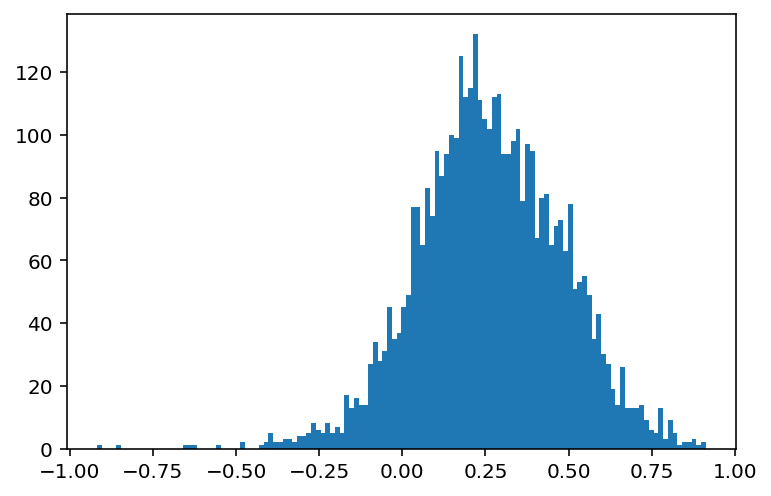

In [70]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]
k=temp_df["MonosomeDepletion"][np.isfinite(temp_df["MonosomeDepletion"])]
plt.hist(k, bins=128);

In [71]:
import skimage.measure
from astropy import convolution
siomd = onsetdf[(~onsetdf.isna().any(axis=1))][["GeneID", "MyOnset", "MonosomeDepletion"]]
siomd.sort_values(by=['MonosomeDepletion'], inplace=True)

In [72]:
flank = 600
rpkm_threshold_for_sixtymers = 0.001
the_matrix = np.full((siomd.shape[0], flank*2), np.nan)
ind = 0
for gene_id in siomd["GeneID"]:
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    ons = int(siomd["MyOnset"][siomd["GeneID"] == gene_id].unique())
    if rpkm_background > rpkm_threshold_for_sixtymers:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        normalized_sixtymers = exp_rpm_bs / rpkm_background
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = normalized_sixtymers[start_position: ons+flank]
        the_matrix[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
the_matrix = the_matrix.T

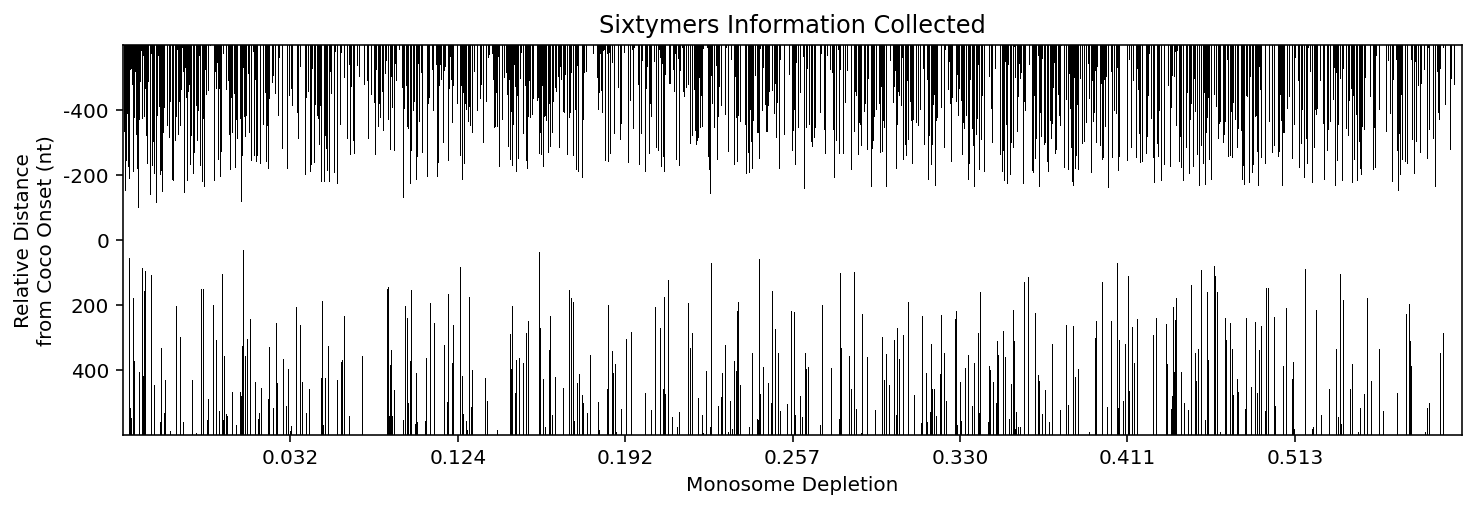

In [73]:
plt.figure(figsize=(12,12))
plt.imshow(~np.isnan(the_matrix), cmap='cubehelix', interpolation='nearest')

locs = np.linspace(0, the_matrix.shape[1], 9)[1:-1]
labels = ["%.3f" % (np.percentile(siomd["MonosomeDepletion"], loc/the_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, the_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - the_matrix.shape[0]/2) / (the_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(the_matrix.shape[0] / 2, color="white", alpha=0.25, linestyle = "--")
plt.xlabel("Monosome Depletion")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Information Collected")
plt.show()

In [74]:
krnl = 13
a_matrix = skimage.measure.block_reduce(the_matrix, (4,4), np.nanmean)
a_matrix = convolution.convolve(a_matrix, np.ones((krnl, krnl)))
print(the_matrix.shape)
print(a_matrix.shape)

(1200, 4121)
(300, 1031)


/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/skimage/measure/block.py:87: RuntimeWarning: Mean of empty slice
  **func_kwargs)


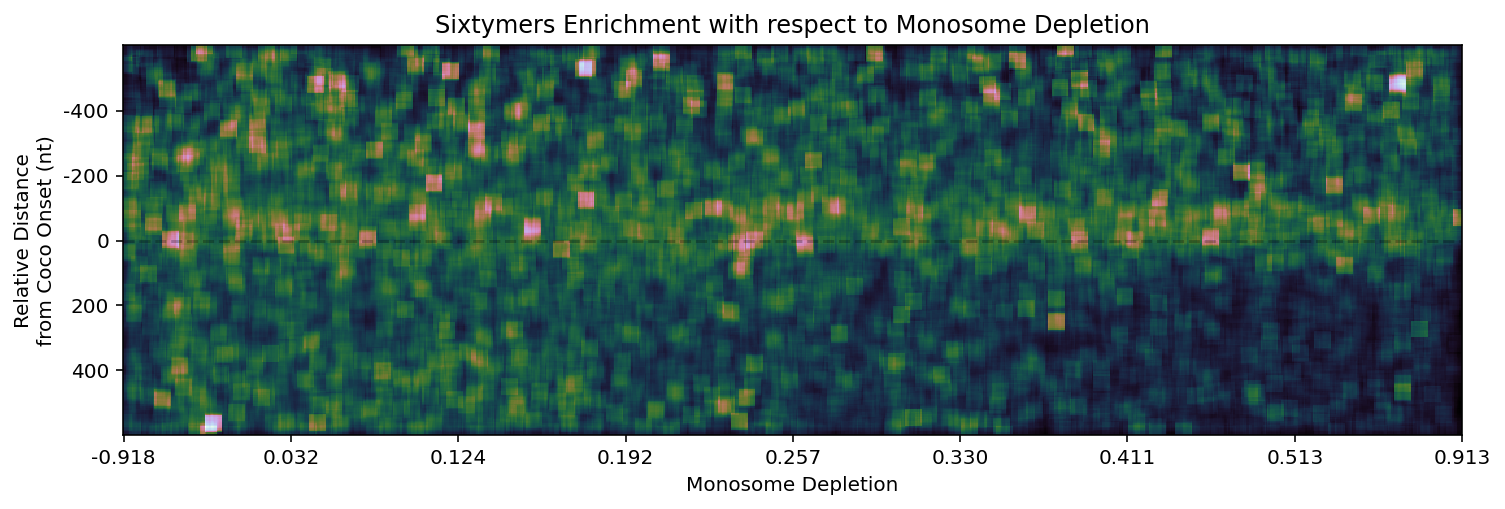

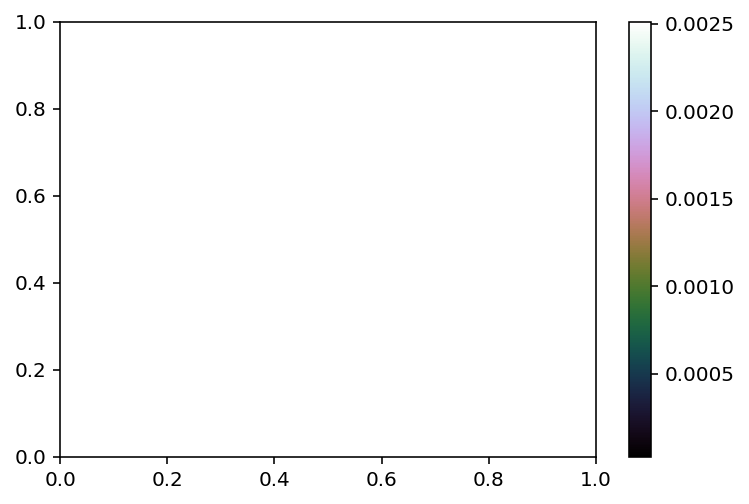

In [76]:
plt.figure(figsize=(12,12))
im = plt.imshow(a_matrix, cmap='cubehelix', interpolation='nearest')
np.percentile(siomd["MonosomeDepletion"], 0/a_matrix.shape[1] * 100)
    
locs = np.linspace(0, a_matrix.shape[1], 9)
labels = ["%.3f" % (np.percentile(siomd["MonosomeDepletion"], loc/a_matrix.shape[1] * 100)) for loc in locs]
plt.xticks(locs, labels)

locs = np.linspace(0, a_matrix.shape[0], 7)[1:-1]
labels = ["%d" % ((loc - a_matrix.shape[0]/2) / (a_matrix.shape[0]/2) * flank) for loc in locs]
plt.yticks(locs, labels)

plt.axhline(a_matrix.shape[0] / 2, color="black", alpha=0.25, linestyle = "--")

plt.xlabel("Monosome Depletion")
plt.ylabel("Relative Distance\nfrom Coco Onset (nt)")
plt.title("Sixtymers Enrichment with respect to Monosome Depletion")
plt.show()

plt.colorbar(im)
plt.show()

## Some More Plots

In [77]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]

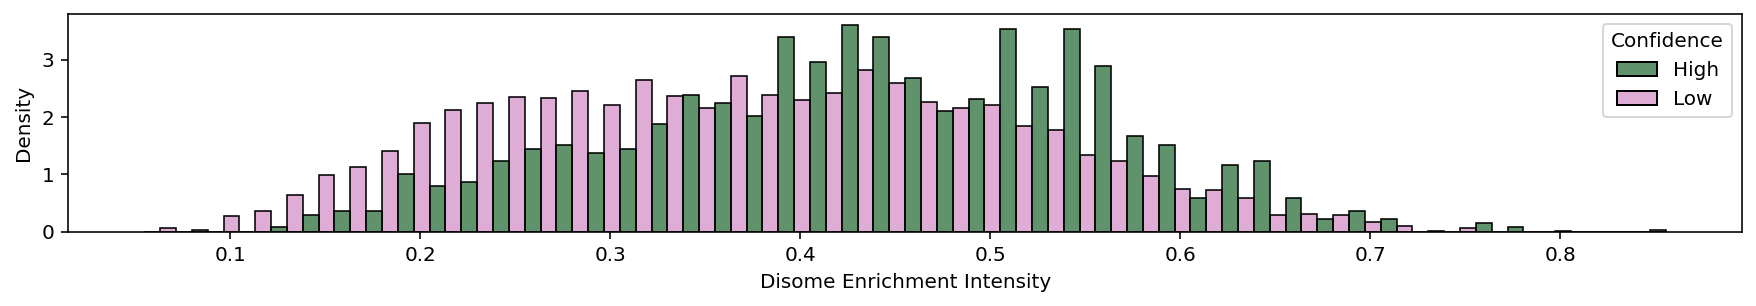

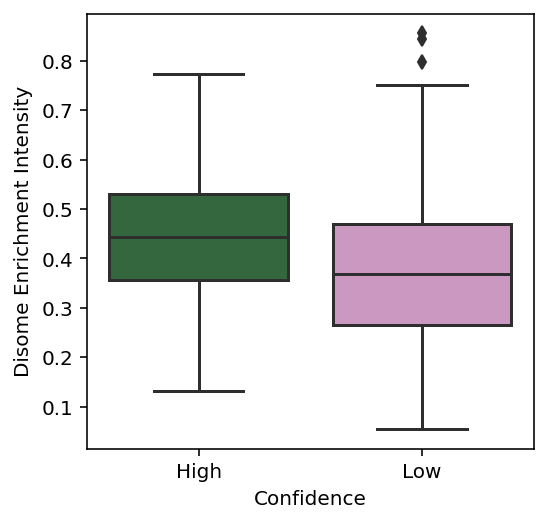

In [79]:
plt.figure(figsize=(15,2))
sns.histplot(data=temp_df, x="HeightAssembly", hue="Confidence", 
             multiple="dodge", stat="density", bins=48, palette="cubehelix", common_norm=False)
plt.xlabel("Disome Enrichment Intensity")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=temp_df, x="Confidence", y="HeightAssembly", palette="cubehelix")
plt.ylabel("Disome Enrichment Intensity")
plt.show()

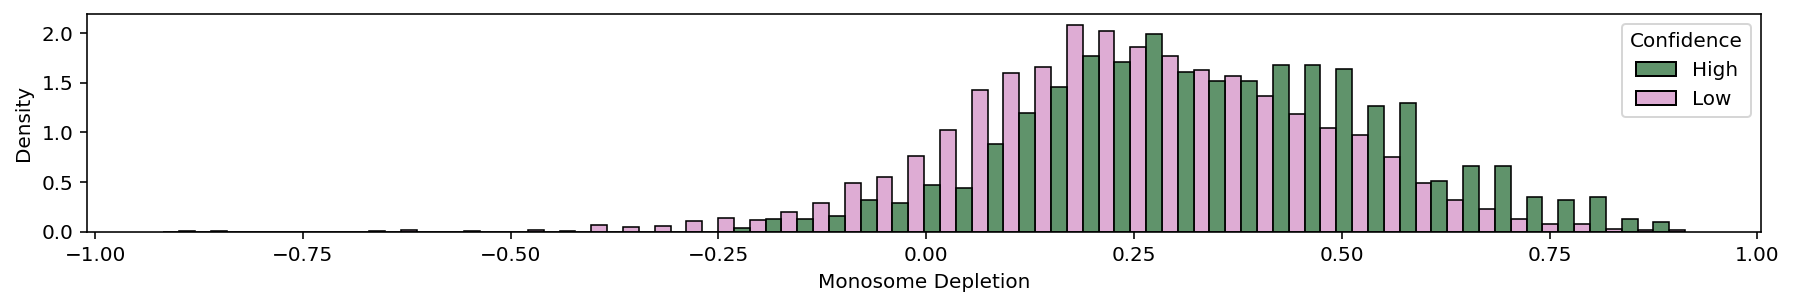

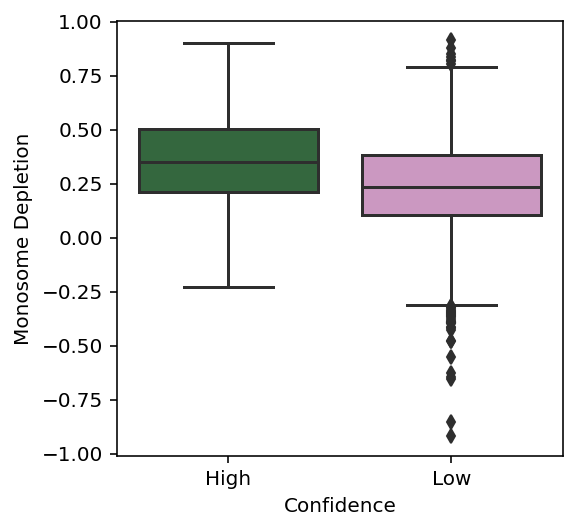

In [78]:
plt.figure(figsize=(15,2))
sns.histplot(data=temp_df, x="MonosomeDepletion", hue="Confidence", 
             multiple="dodge", stat="density", bins=48, palette="cubehelix", common_norm=False)
plt.xlabel("Monosome Depletion")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=temp_df, x="Confidence", y="MonosomeDepletion", palette="cubehelix")
plt.ylabel("Monosome Depletion")
plt.show()

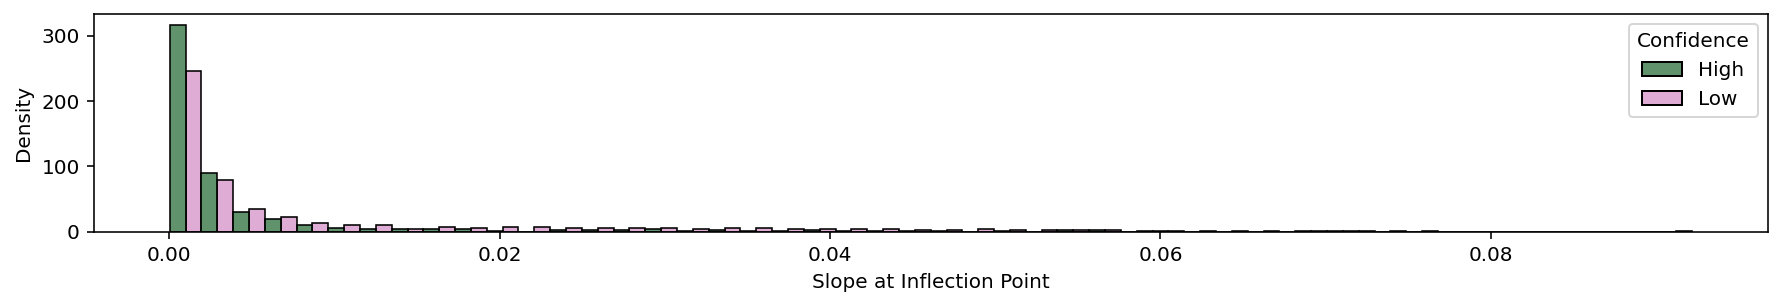

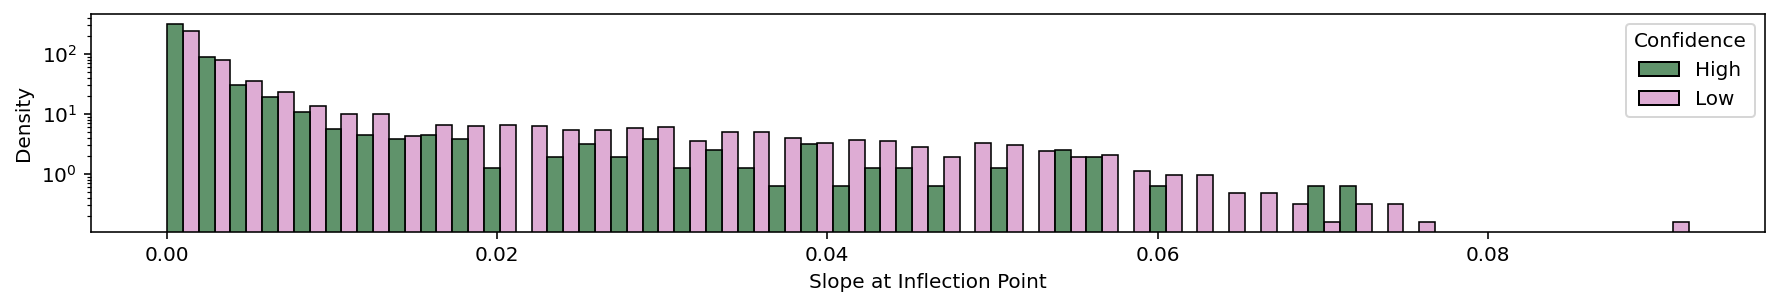

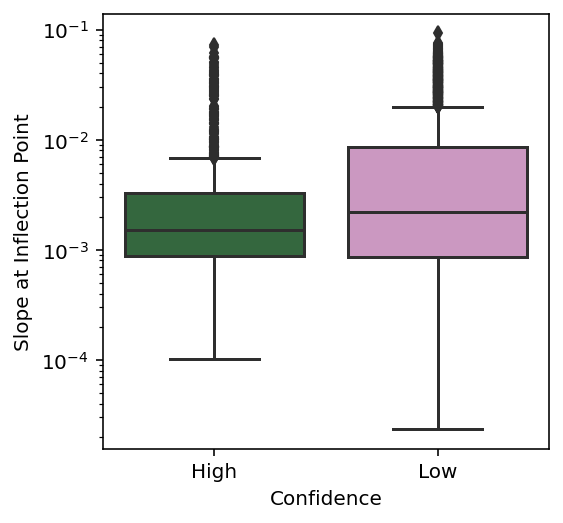

In [80]:
plt.figure(figsize=(15,2))
sns.histplot(data=temp_df, x="SlopeMyOnset", hue="Confidence", 
             multiple="dodge", stat="density", bins=48, palette="cubehelix", common_norm=False)
plt.xlabel("Slope at Inflection Point")
plt.show()

plt.figure(figsize=(15,2))
sns.histplot(data=temp_df, x="SlopeMyOnset", hue="Confidence", 
             multiple="dodge", stat="density", bins=48, palette="cubehelix", common_norm=False)
plt.xlabel("Slope at Inflection Point")
plt.yscale("log")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=temp_df, x="Confidence", y="SlopeMyOnset", palette="cubehelix")
plt.ylabel("Slope at Inflection Point")
plt.yscale("log")
plt.show()

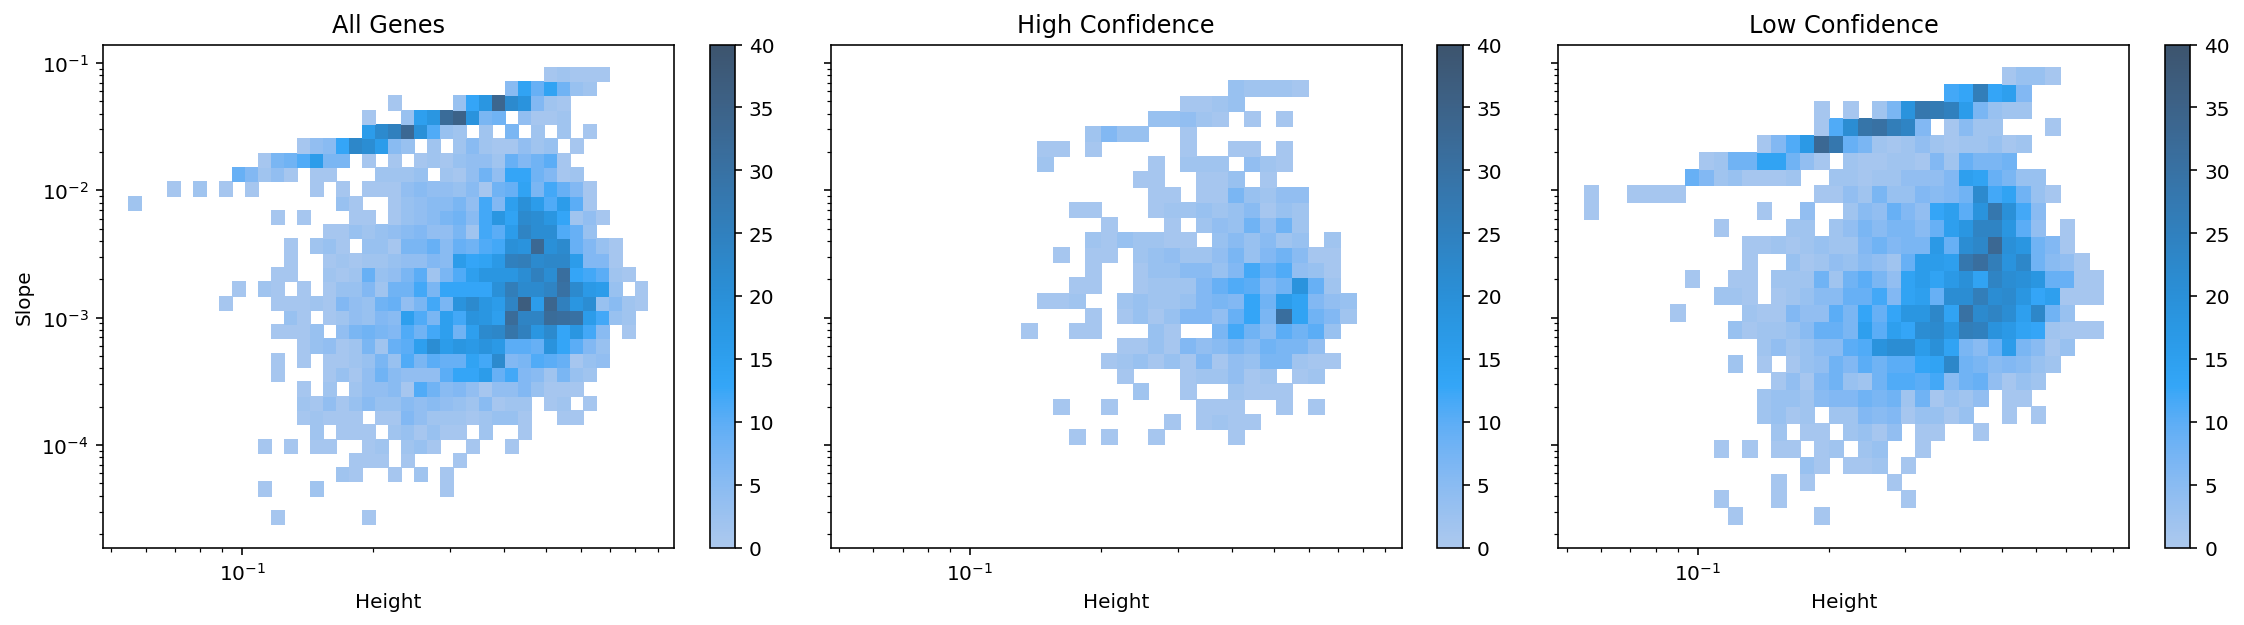

In [81]:
fig, ax = plt.subplots(1, 3, figsize=[16, 4.5], sharex=True, sharey=True) 

sns.histplot(data=temp_df, y="SlopeMyOnset", x="HeightAssembly",
             log_scale=(True, True), cbar=True, ax=ax[0], vmin=0, vmax=40,)
ax[0].set_ylabel("Slope")
ax[0].set_xlabel("Height")
ax[0].set_title("All Genes")

sns.histplot(data=temp_df[temp_df["Confidence"] == "High"], y="SlopeMyOnset", x="HeightAssembly",
             log_scale=(True, True), cbar=True, ax=ax[1], vmin=0, vmax=40,)
ax[1].set_ylabel("Slope")
ax[1].set_xlabel("Height")
ax[1].set_title("High Confidence")

sns.histplot(data=temp_df[temp_df["Confidence"] == "Low"], y="SlopeMyOnset", x="HeightAssembly",
             log_scale=(True, True), cbar=True, ax=ax[2], vmin=0, vmax=40,)
ax[2].set_ylabel("Slope")
ax[2].set_xlabel("Height")
ax[2].set_title("Low Confidence")

plt.tight_layout()
plt.show()

Check weird sharp slopes section

## Transmembrane Domains

In [16]:
#script_path_tmhmm_db = os.path.abspath(os.path.join(os.path.dirname(script_path_infrastructure), "tmhmm.R"))
ero = ensembl_release_object_creator(I.temp_repo_dir, I.ensembl_release, I.organism)
#I.db_tmhmm = EnsemblDomain(I.temp_repo_dir, script_path_tmhmm_db, I.protein_genome,
#                                                 ero, ensembl_release=I.ensembl_release,
#                                                 organism=I.organism, verbose=I.verbose)
I.db_tmhmm = joblib.load("/home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/tmhmm.joblib")
tmd_genes = list(set([ero.gene_id_of_protein_id(i) for i in I.db_tmhmm.df["ensembl_peptide_id"].unique()]))

INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.cdna.all.fa.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.pep.all.fa.pickle


In [17]:
tmd_temp = list()
constantandshort_temp = list()
for row_series in onsetdf.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = row_series[1]["MyOnset"]
    if not np.isnan(ons):
        c = "ConstantandShort" if row_series[1]["WidthAssembly"] < 12 else "Others"
        constantandshort_temp.append(c)        
    else:
        constantandshort_temp.append(np.nan)
    t = "ContainsTMD" if gene_id in tmd_genes else "NoTMD"
    tmd_temp.append(t)
onsetdf["TMD"] = tmd_temp
onsetdf["WidthCategory"] = constantandshort_temp
onsetdf.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  SlopeClass  \
0        0.121248       102.058374    89.765197      0.005300         2.0   
1        0.023634        13.453680    20.600090      0.010595         2.0   
2        0.005600         7.619262    10.523488      0.011941         2.0   
3        0.061421        71.800416    65.873338      0.002370         2.0   
4        0.031557        27.380521    25.648697      0.000598         1.0   

   HeightAssembly  WidthAssembly  MonDep_lg_val  MonosomeDepletion    TMD  \
0        0.497321      93.833881          975.0           0.439295  NoTMD   
1        0.556481      52.523687          506.0           0.694991  NoTMD   
2        0.427146      35.771692          931.0           0.251714  NoTMD   
3        0.283736     119.731143          900.0           0.107714  NoTMD   
4        0.389167     650.791953         2955.0           0.343435  NoTMD   

  WidthCategory  
0        Others  
1        Others  
2        Others  
3        Others  
4        Others

In [18]:
# Create boolean arrays of tm domains for each genes in onsetdb.
tmd_dict = dict()
for gene_id in I.gene_list:
    if not pd.isna(gene_id):
        best_protein = I.gene_info[gene_id].transcripts.iloc[0, 1]
        best_transcript = I.gene_info[gene_id].transcripts.iloc[0, 0]
        the_vector = np.zeros(len(I.protein_genome.db[best_transcript][1]) * 3).astype(np.int8)
        tmd_info = I.db_tmhmm.df[I.db_tmhmm.df["ensembl_peptide_id"] == best_protein]
        for start, end in zip(tmd_info["tmhmm_start"], tmd_info["tmhmm_end"]):
            the_vector[start * 3 - 3: end * 3 - 1] = 1
        tmd_dict[gene_id] = the_vector

## mRNA Secondary Structure

In [20]:
# Download RNAStructuromeDB
ss_ed_for = "all_chr_forward_ed.bw"
ss_ed_rev = "all_chr_reverse_ed_0.bw"
ss_fmfe_for = "all_chr_forward_fmfe.bw"
ss_fmfe_rev = "all_chr_reverse_fmfe.bw"
ss_mfe_for = "all_chr_forward_mfe.bw"
ss_mfe_rev = "all_chr_reverse_mfe.bw"
ss_pvalue_for = "all_chr_forward_pvalue_0.bw"
ss_pvalue_rev = "all_chr_reverse_pvalue.bw"
ss_zscore_for = "all_chr_forward_zscore_0.bw"
ss_zscore_rev = "all_chr_reverse_zscore.bw"

In [21]:
def convert_mrna_sec_str_dict(f_for, f_rev):
    counter = 0
    the_dict = dict()
    
    f_for = os.path.join(temp_repo_dir, "rnastructuromedb", f_for)
    f_rev = os.path.join(temp_repo_dir, "rnastructuromedb", f_rev)
    
    with pyBigWig.open(f_for) as bw_for, pyBigWig.open(f_rev) as bw_rev:
    
        available_for = list(bw_for.chroms().keys())
        available_rev = list(bw_rev.chroms().keys())
    
        for ind, row_series in onsetdf.iterrows():
            the_list = list()
            # progress_bar(ind, len(onsetdf)-1, verbose=True)
            
            gene_id = row_series["GeneID"]
            if pd.isna(gene_id):
                continue
            
            best_transcript = I.gene_info[gene_id].transcripts.iloc[0,0]
            transcript_info = I.protein_genome.db[best_transcript]
            cds_ranges = transcript_info[0]
            contig = transcript_info[3]
            contig = "chr" + str(contig)
            strand = transcript_info[4]
            
            assert strand in ["+", "-"]
            try: 
                for rng in cds_ranges:
                    if strand == "+":
                        assert contig in available_for
                        the_list.append(bw_for.values(contig, rng[0], rng[1] + 1, numpy=True))
                    else:
                        assert contig in available_rev
                        the_list.append(np.flip(bw_rev.values(contig, rng[1], rng[0] + 1, numpy=True)))
                the_dict[gene_id] = np.concatenate(the_list)
            except AssertionError:
                counter += 1
            
    print(counter)
    return the_dict        

In [22]:
ss_mfe = convert_mrna_sec_str_dict(ss_mfe_for, ss_mfe_rev)
ss_ed = convert_mrna_sec_str_dict(ss_ed_for, ss_ed_rev)
ss_fmfe = convert_mrna_sec_str_dict(ss_fmfe_for, ss_fmfe_rev)
ss_pvalue = convert_mrna_sec_str_dict(ss_pvalue_for, ss_pvalue_rev)
ss_zscore = convert_mrna_sec_str_dict(ss_zscore_for, ss_zscore_rev)

411
411
411
411
411


In [24]:
print("Done")

Done


## Categorization for Further Analysis

In [19]:
m_count = list()
m_close = list()
for ind, row_series in onsetdf.iterrows():
    gene_id = row_series["GeneID"]
    ons = row_series["MyOnset"]
    if pd.isna(gene_id) or pd.isna(ons):
        m_count.append(np.nan)
        m_close.append(np.nan)
    else:
        col = gene_collision[gene_id]
        m_count.append(len(col))
        
        ons = int(ons) 
        closest_peak = (col-ons)[np.argmin(np.abs(col-ons))] if len(col) > 0 else np.nan
        closest_peak = closest_peak if closest_peak != 0 else 1
        m_close.append(closest_peak)
        
onsetdf["PeakCount"] = m_count
onsetdf["ClosestPeak"] = m_close
onsetdf.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  SlopeClass  \
0        0.121248       102.058374    89.765197      0.005300         2.0   
1        0.023634        13.453680    20.600090      0.010595         2.0   
2        0.005600         7.619262    10.523488      0.011941         2.0   
3        0.061421        71.800416    65.873338      0.002370         2.0   
4        0.031557        27.380521    25.648697      0.000598         1.0   

   HeightAssembly  WidthAssembly  MonDep_lg_val  MonosomeDepletion    TMD  \
0        0.497321      93.833881          975.0           0.439295  NoTMD   
1        0.556481      52.523687          506.0           0.694991  NoTMD   
2        0.427146      35.771692          931.0           0.251714  NoTMD   
3        0.283736     119.731143          900.0           0.107714  NoTMD   
4        0.389167     650.791953         2955.0           0.343435  NoTMD   

  WidthCategory  PeakCount  ClosestPeak  
0        Others        9.0         15.0  
1        Others        2.0        382.0  
2        Others        3.0        -20.0  
3        Others        4.0        -16.0  
4        Others        8.0        -71.0

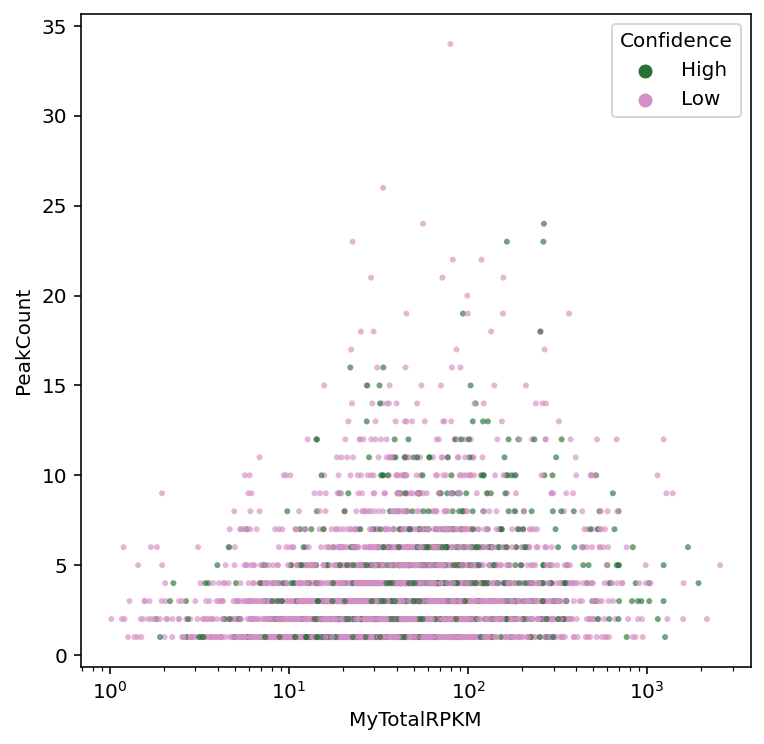

In [83]:
plt.figure(figsize=(6, 6))
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]
sns.scatterplot(data=temp_df, x="MyTotalRPKM", y="PeakCount", hue="Confidence", alpha=0.65,
                palette="cubehelix", linewidth=0, marker = ".")
plt.xscale("log")

(array([2.503e+03, 6.490e+02, 2.060e+02, 1.070e+02, 1.900e+01, 1.100e+01,
        1.000e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

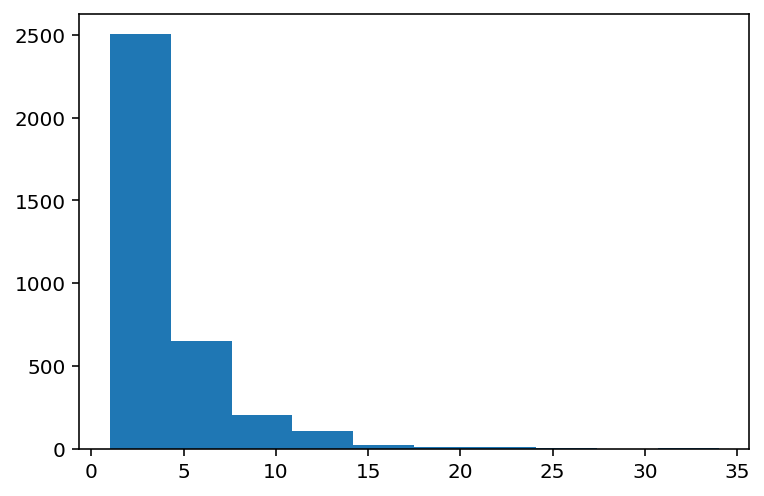

In [84]:
plt.hist(temp_df["PeakCount"])

In [32]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]
tofrank = temp_df[["GeneID", "GeneName", "Confidence", "GeneLength", "MyOnset", "SlopeMyOnset", "HeightAssembly", "MonosomeDepletion"]]
#tofrank
#joblib.dump(tofrank, "tofrank_corrected.joblib")

## Weird Sharp Slopes

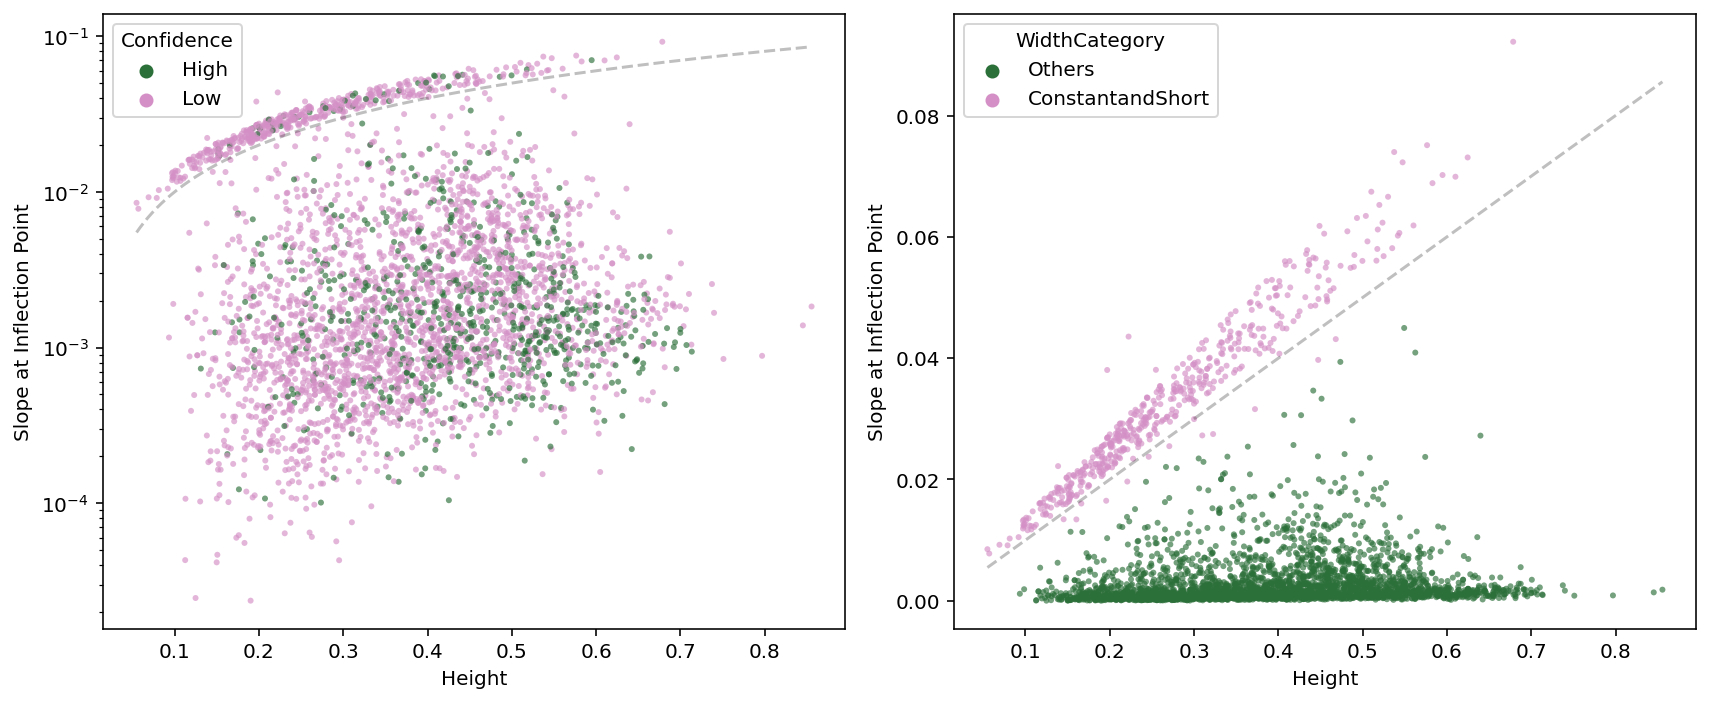

In [88]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x_data = np.linspace(temp_df["HeightAssembly"].min(), temp_df["HeightAssembly"].max(), 1000)
sns.scatterplot(data=temp_df, x="HeightAssembly", y="SlopeMyOnset", hue="WidthCategory", alpha=0.65,
                palette="cubehelix", linewidth=0, marker = ".", ax=ax[1])
ax[0].plot(x_data, x_data / 10, color="black", alpha=0.25, linestyle = "--")
ax[0].set_xlabel("Height")
ax[0].set_ylabel("Slope at Inflection Point")
ax[0].set_yscale("log")

sns.scatterplot(data=temp_df, x="HeightAssembly", y="SlopeMyOnset", hue="Confidence", alpha=0.65,
                palette="cubehelix", linewidth=0, marker = ".", hue_order=["High", "Low"], ax=ax[0])
ax[1].set_xlabel("Height")
ax[1].set_ylabel("Slope at Inflection Point")
ax[1].plot(x_data, x_data / 10, color="black", alpha=0.25, linestyle = "--")

plt.tight_layout()

Interesting.. Because a certain number of coco assembl completed within a certain nucleotide number. Let'me show it more clearly.

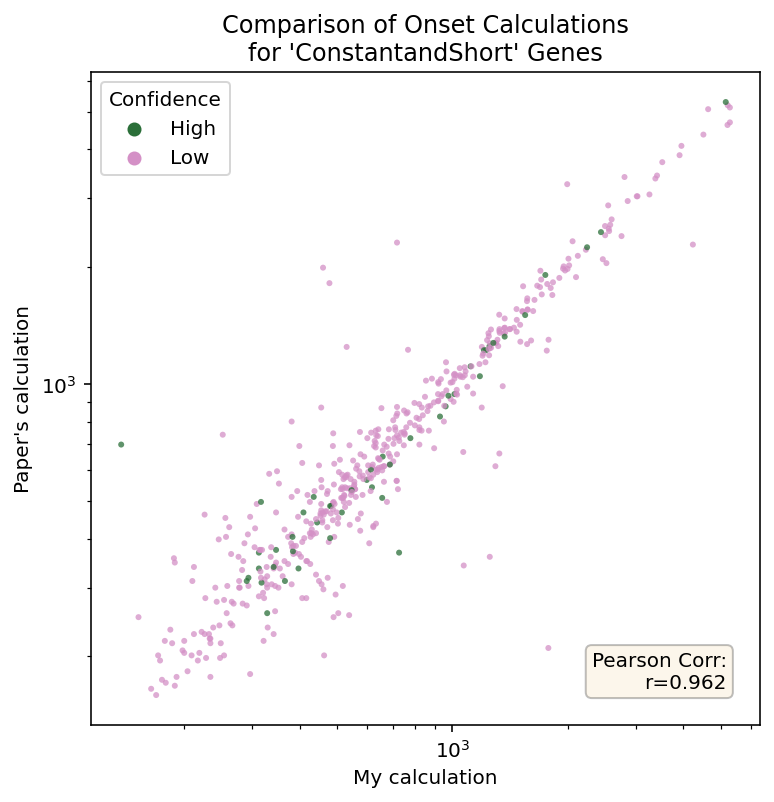

In [89]:
# Make sure I calculated correctly..
plt.figure(figsize=(6, 6))
temp_df_k = temp_df[(temp_df["WidthCategory"] == "ConstantandShort")].sort_values("SlopeMyOnset") 
sns.scatterplot(data=temp_df_k, y="PapersOnset", x="MyOnset", hue="Confidence", alpha=0.75,
                palette="cubehelix", linewidth=0, marker = ".", hue_order=["High", "Low"])
r_all_k = stats.pearsonr(temp_df_k["MyOnset"], temp_df_k["PapersOnset"])
plt.text(0.95, 0.05, "Pearson Corr:\nr=%.3f" % r_all_k[0], 
            transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment="right", alpha=1,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))

plt.xlabel("My calculation")
plt.ylabel("Paper's calculation")
plt.title(f"Comparison of Onset Calculations\nfor 'ConstantandShort' Genes")
plt.xscale("log")
plt.yscale("log")
plt.show()

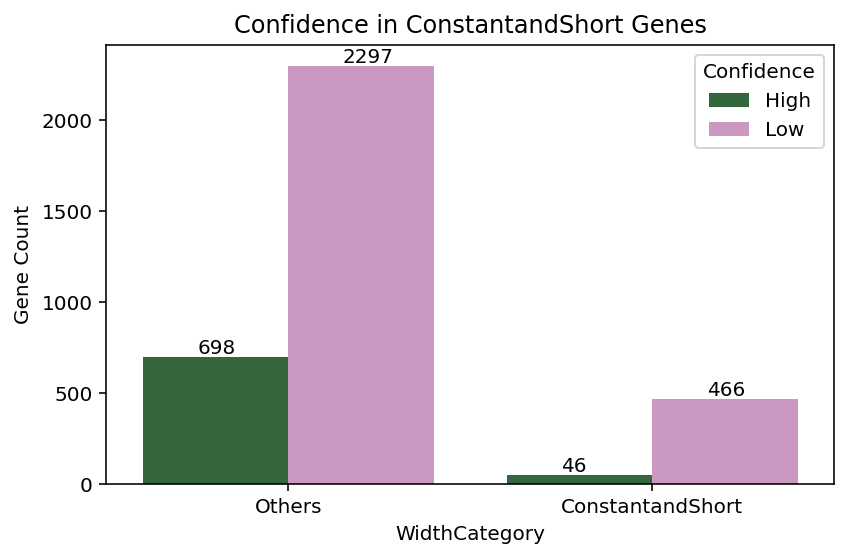

In [90]:
ax = sns.countplot(data=temp_df, x="WidthCategory", hue="Confidence", palette="cubehelix", hue_order=["High", "Low"])
plt.ylabel("Gene Count")
for p in ax.patches:
    ax.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+20))
plt.title("Confidence in ConstantandShort Genes")
plt.tight_layout()

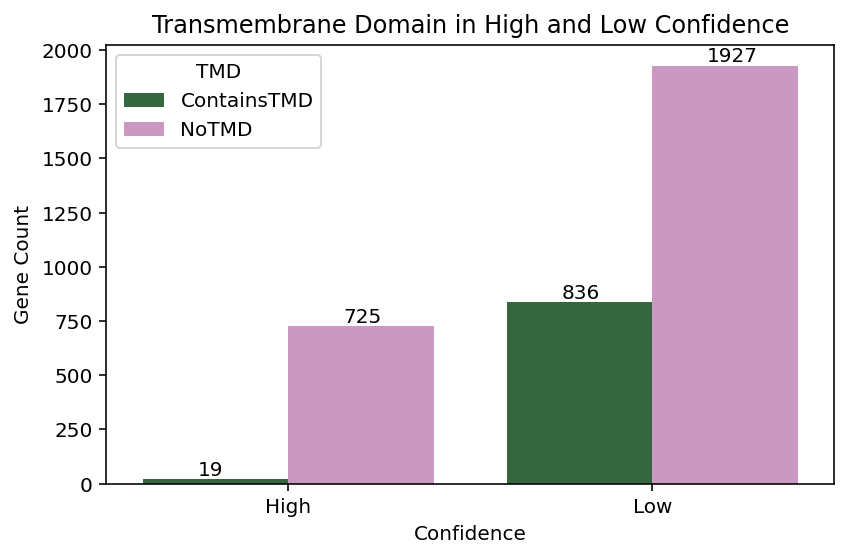

In [91]:
ax = sns.countplot(data=temp_df, x="Confidence", hue="TMD", palette="cubehelix", hue_order=["ContainsTMD", "NoTMD"])
plt.ylabel("Gene Count")
for p in ax.patches:
    ax.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+20))
plt.title("Transmembrane Domain in High and Low Confidence")
plt.tight_layout()

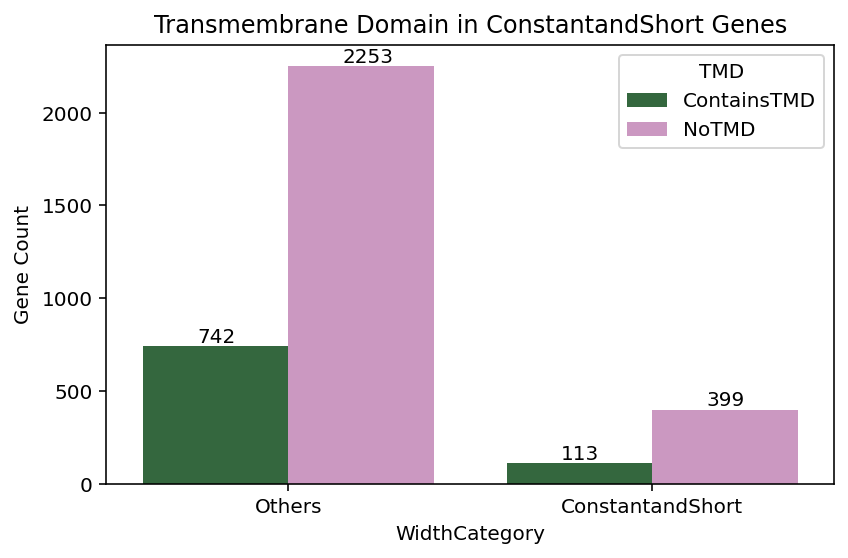

In [92]:
ax = sns.countplot(data=temp_df, x="WidthCategory", hue="TMD", palette="cubehelix", hue_order=["ContainsTMD", "NoTMD"])
plt.ylabel("Gene Count")
for p in ax.patches:
    ax.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+20))
plt.title("Transmembrane Domain in ConstantandShort Genes")
plt.tight_layout()

#### Check if the onset point is at intron - exon junction. 

In [93]:
closest_junction = list()
for gene_id in temp_df_k["GeneID"]:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0,0]
    strand = I.gene_info[gene_id].strand
    ons = int(temp_df_k[temp_df_k["GeneID"] == gene_id].iloc[0]["MyOnset"])
    kl, k = list(), 0
    for i,j in I.protein_genome.db[best_transcript][0]:
        k += j-i+1 if strand == "+" else i-j+1
        kl.append(k)
    cj = min(kl, key=lambda x:abs(x-ons))
    closest_junction.append(cj)
closest_junction = np.array(closest_junction)
## 
closest_junction_global = list()
for gene_id in temp_df["GeneID"]:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0,0]
    strand = I.gene_info[gene_id].strand
    ons = int(temp_df[temp_df["GeneID"] == gene_id].iloc[0]["MyOnset"])
    kl, k = list(), 0
    for i,j in I.protein_genome.db[best_transcript][0]:
        k += j-i+1 if strand == "+" else i-j+1
        kl.append(k)
    cj = min(kl, key=lambda x:abs(x-ons))
    closest_junction_global.append(cj)
closest_junction_global = np.array(closest_junction_global)

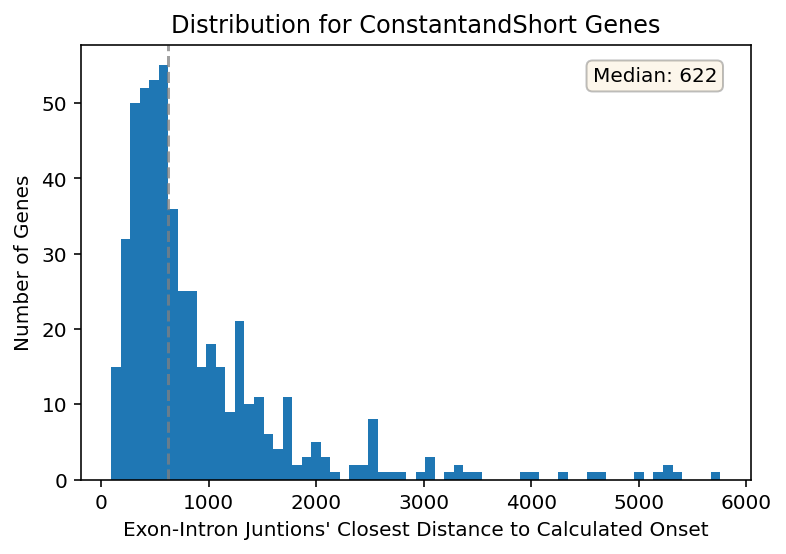

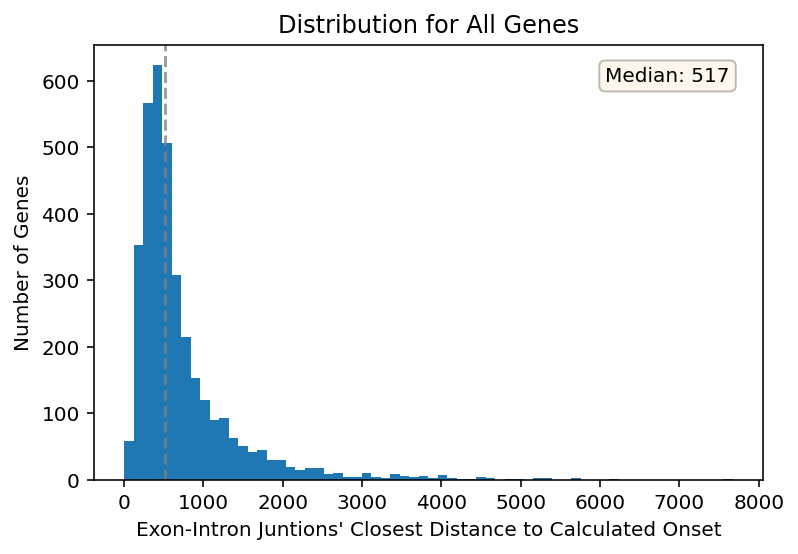

In [94]:
plt.hist(closest_junction, bins=64)
plt.xlabel("Exon-Intron Juntions' Closest Distance to Calculated Onset")
plt.ylabel("Number of Genes")
plt.title("Distribution for ConstantandShort Genes")
the_median = np.median(closest_junction)
plt.axvline(the_median, color="gray", alpha=0.75, linestyle = "--")
plt.text(0.95, 0.95, "Median: %2d" % (the_median), 
            transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment="right", alpha=1,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))
plt.show()

plt.hist(closest_junction_global, bins=64)
plt.xlabel("Exon-Intron Juntions' Closest Distance to Calculated Onset")
plt.ylabel("Number of Genes")
plt.title("Distribution for All Genes")
the_median = np.median(closest_junction_global)
plt.axvline(the_median, color="gray", alpha=0.75, linestyle = "--")
plt.text(0.95, 0.95, "Median: %2d" % (the_median), 
            transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment="right", alpha=1,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))
plt.show()

## CocoAssembly Onset and Transmembrane Domains

In [95]:
temp_df = onsetdf[(~onsetdf.isna().any(axis=1))]
#temp_df = temp_df[temp_df["TMD"] != "NoTMD"]

In [96]:
flank = 600
metag = np.full((temp_df.shape[0], flank * 2), np.nan)
ind = 0
for row_series in temp_df.iterrows():
    gene_id = row_series[1]["GeneID"]
    ons = int(row_series[1]["MyOnset"])
    arr = tmd_dict[gene_id]
    start_position = max(0, ons-flank)
    start_offset = -min(0, ons-flank)
    marr = arr[start_position: ons+flank]
    metag[ind, start_offset: len(marr) + start_offset] = marr
    ind += 1
ind

3507

In [97]:
# RANDOM Onset
onset_gene = 25
metag_average = np.full((temp_df.shape[0] * onset_gene, flank * 2), np.nan)
ind = 0
for row_series in temp_df.iterrows():
    gene_id = row_series[1]["GeneID"]
    arr = tmd_dict[gene_id]
    for _ in range(onset_gene):
        ons = np.random.randint(gene_lengths[gene_id])
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = arr[start_position: ons+flank]
        metag_average[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

87675

In [98]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[1, 358], [397, 518]]


In [99]:
kk = 0.95 
bootstrap_ci = confidence_interval_normal(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_normal(metag_average, confidence=1-((1-kk) / onset_gene))

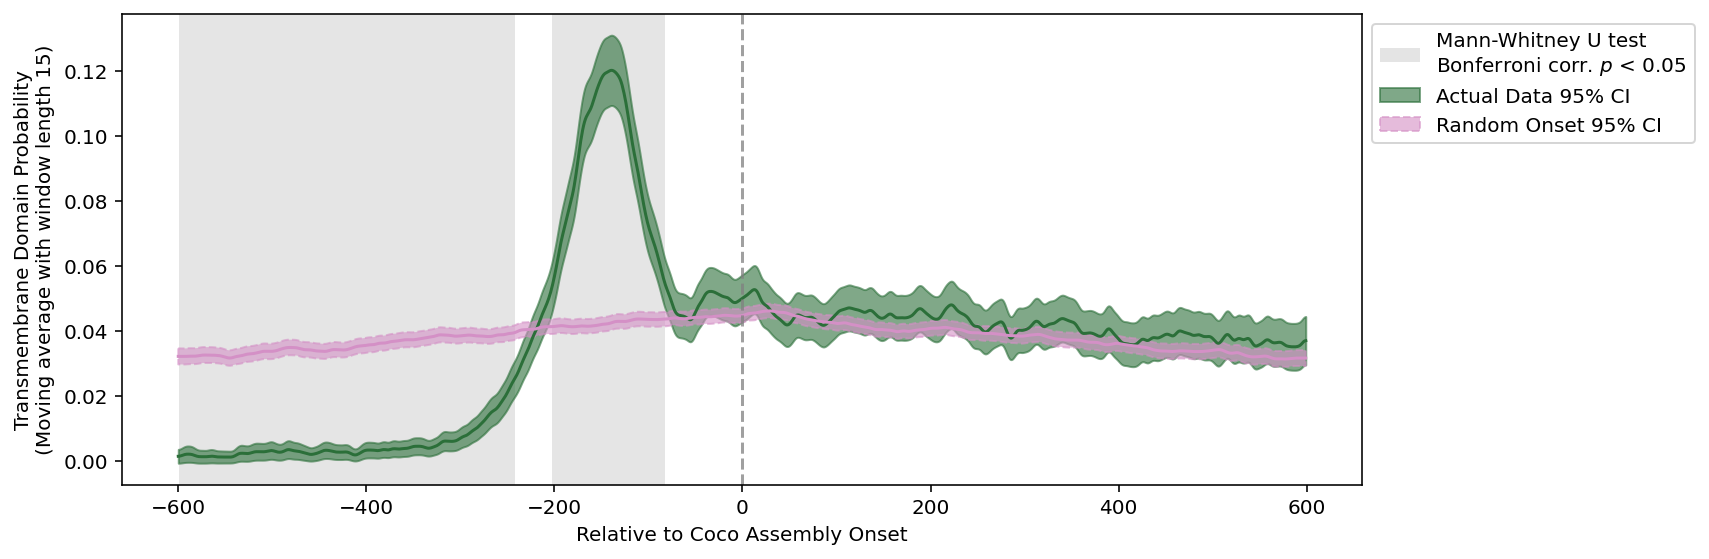

In [100]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))

plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.6, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.6, linestyle="--", label="Random Onset 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Coco Assembly Onset")
plt.ylabel("Transmembrane Domain Probability\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Sixtymers Enrichment and Transmembrane Domains

metagene_profile:
- origin: first nt of first tmd 
- data: sixtymers 


#### For All Genes

In [101]:
genes_of_tmd = [i for i in tmd_dict if np.sum(tmd_dict[i]) > 0]
len(genes_of_tmd)

6304

No association is seen if rpkm_threshold == 0.1 but similar result if rpkm_threshold == 0.1

#### Only for Coco Assembly Condidates

In [102]:
tmd_onset_genes = list(temp_df[temp_df["TMD"] != "NoTMD"]["GeneID"])
genes_of_tmd = [i for i in tmd_dict if np.sum(tmd_dict[i]) > 0 and i in tmd_onset_genes]
len(genes_of_tmd)

768

In [103]:
rpkm_threshold_for_sixtymers = 1

In [104]:
flank = 350
metag = np.full((len(genes_of_tmd), flank * 2), np.nan)
ind = 0
for gene_id in genes_of_tmd:
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    ons = np.where(tmd_dict[gene_id] != 0)[0]
    if rpkm_background > rpkm_threshold_for_sixtymers and len(ons) > 0:
        ons = ons[0]
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        arr = exp_rpm_bs / rpkm_background
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = arr[start_position: ons+flank]
        metag[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

768

In [105]:
# RANDOM Onset
onset_gene = 25
metag_average = np.full((len(genes_of_tmd) * onset_gene, flank * 2), np.nan)
ind = 0
for gene_id in genes_of_tmd:
    rpkm_background = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    ons = np.where(tmd_dict[gene_id] != 0)[0]
    if rpkm_background > rpkm_threshold_for_sixtymers and len(ons) > 0:
        exp_rpm_bs = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
        arr = exp_rpm_bs / rpkm_background
        for _ in range(onset_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            start_position = max(0, ons-flank)
            start_offset = -min(0, ons-flank)
            marr = arr[start_position: ons+flank]
            metag_average[ind, start_offset: len(marr) + start_offset] = marr
            ind += 1
ind


19200

In [106]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[370, 371], [373, 373], [410, 600]]


In [107]:
kk = 0.95 
bootstrap_ci = confidence_interval_normal(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_normal(metag_average, confidence=1-((1-kk) / onset_gene))

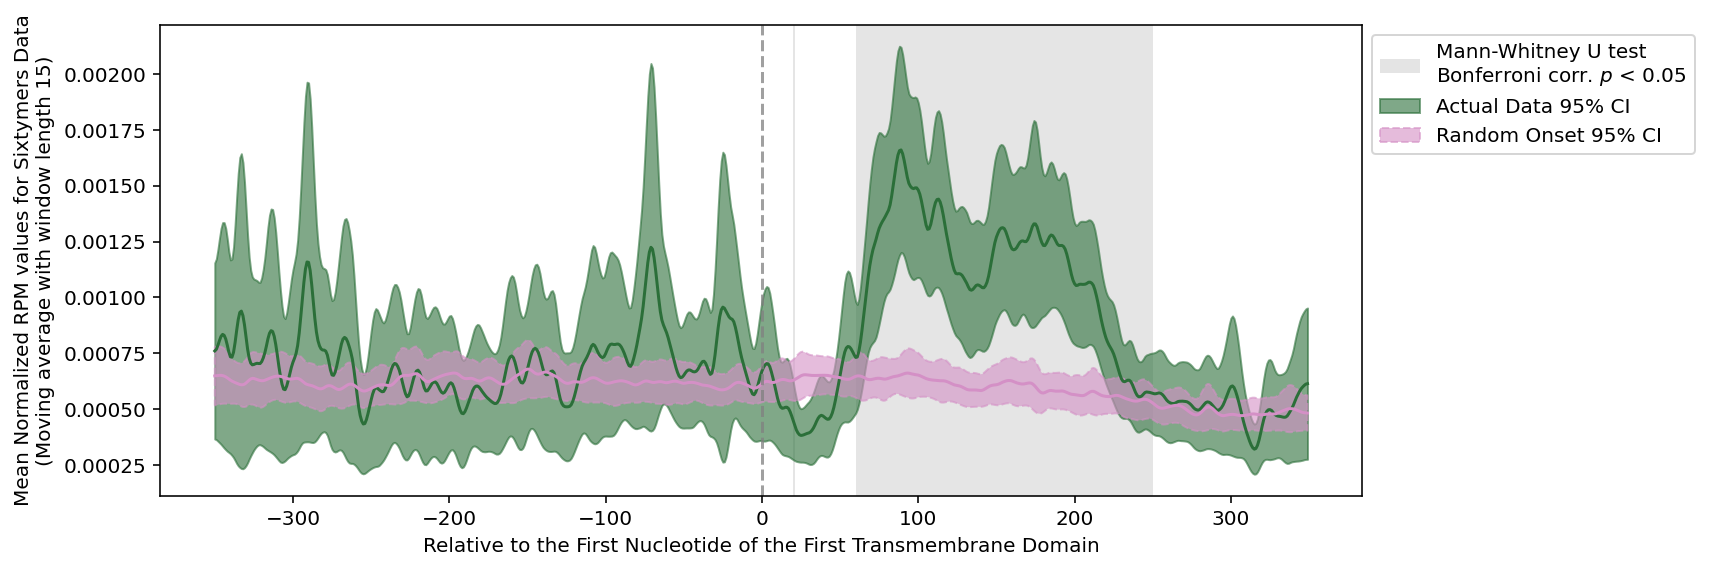

In [108]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))

plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.6, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.6, linestyle="--", label="Random Onset 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to the First Nucleotide of the First Transmembrane Domain")
plt.ylabel("Mean Normalized RPM values for Sixtymers Data\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## CocoAssembly Sigmoidal Curve and Transmembrane Domains: DEPRECATED

metagene_profile:
- origin: first nt of first tmd 
- data: sigmoidal curve

In [109]:
tmd_onset_genes = list(temp_df[temp_df["TMD"] != "NoTMD"]["GeneID"])
genes_of_tmd = [i for i in tmd_dict if np.sum(tmd_dict[i]) > 0 and i in tmd_onset_genes]
len(genes_of_tmd)

768

In [110]:
rpkm_threshold_for_sixtymers = 1

In [111]:
flank = 2500
metag = np.full((len(genes_of_tmd), flank * 2), np.nan)
ind = 0
for gene_id in genes_of_tmd:

    ons = np.where(tmd_dict[gene_id] != 0)[0]
    if len(ons) > 0:
        ons = ons[0]
        
        arr = I.riboseq_coco.calculate_curve(gene_id)
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = arr[start_position: ons+flank]
        metag[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1981: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1982: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1977: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init


768

In [112]:
# RANDOM Onset
onset_gene = 25
metag_average = np.full((len(genes_of_tmd) * onset_gene, flank * 2), np.nan)
ind = 0
for gene_id in genes_of_tmd:

    ons = np.where(tmd_dict[gene_id] != 0)[0]
    if len(ons) > 0:
        
        arr = I.riboseq_coco.calculate_curve(gene_id)
        for _ in range(onset_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            start_position = max(0, ons-flank)
            start_offset = -min(0, ons-flank)
            marr = arr[start_position: ons+flank]
            metag_average[ind, start_offset: len(marr) + start_offset] = marr
            ind += 1
ind


19200

In [113]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[1586, 1701], [1727, 1727], [1730, 1735], [1739, 1744], [1826, 1837], [1840, 2728], [2812, 3593], [3603, 3608]]


In [114]:
kk = 0.95 
bootstrap_ci = confidence_interval_normal(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_normal(metag_average, confidence=1-((1-kk) / onset_gene))

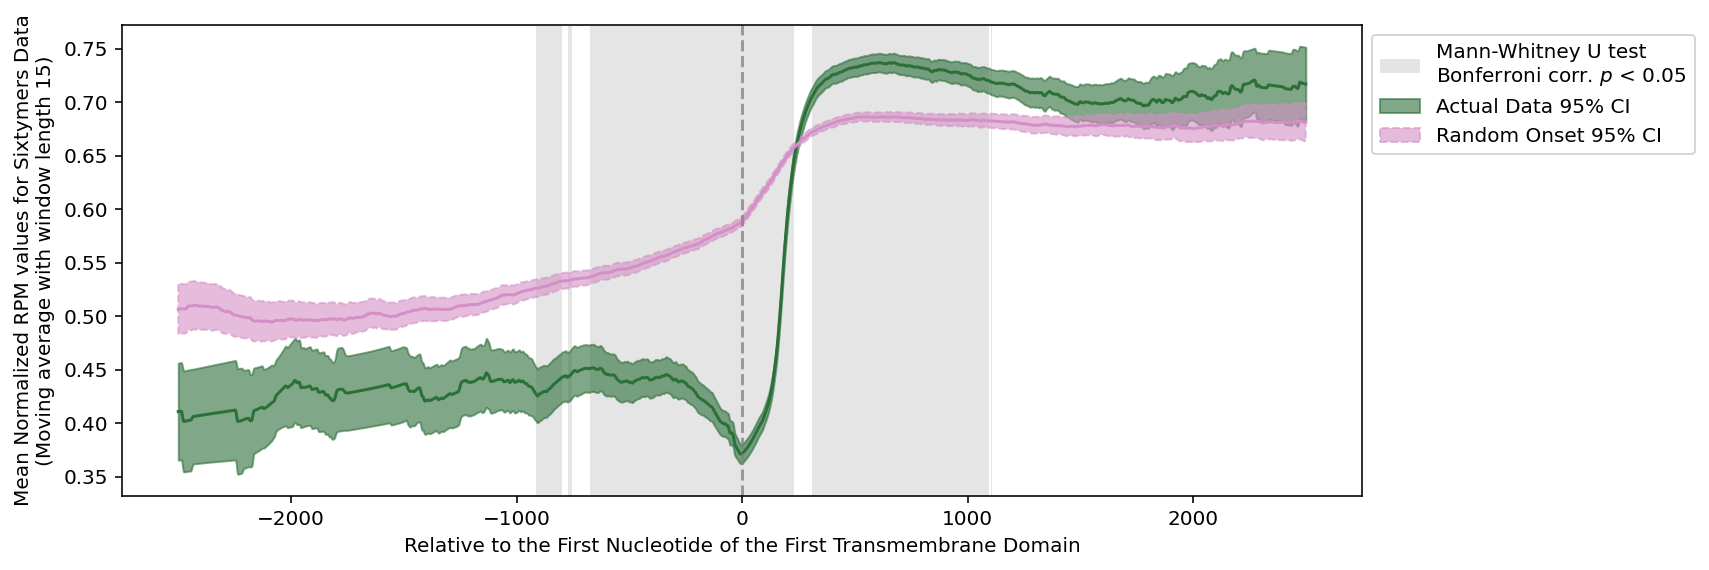

In [115]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))

plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.6, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.6, linestyle="--", label="Random Onset 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to the First Nucleotide of the First Transmembrane Domain")
plt.ylabel("Mean Normalized RPM values for Sixtymers Data\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Transmembrane Domains cause Collision cause CocoAssembly?

In [116]:
onsetdf.head()

GeneID GeneName  MyOnset  PapersOnset Confidence  GeneLength  \
0  ENSG00000094914     AAAS    461.0        465.0       High      1638.0   
1  ENSG00000081760     AACS    312.0        303.0       High      2016.0   
2  ENSG00000109576    AADAT    418.0        558.0        Low      1275.0   
3  ENSG00000131043     AAR2    356.0        321.0       High      1152.0   
4  ENSG00000124608    AARS2    622.0        642.0        Low      2955.0   

   PaperTotalRPKM  MySixtymersRPKM  MyTotalRPKM  SlopeMyOnset  HeightAssembly  \
0        0.121248       102.058374    89.765197      0.005300        0.497321   
1        0.023634        13.453680    20.600090      0.010595        0.556481   
2        0.005600         7.619262    10.523488      0.011941        0.427146   
3        0.061421        71.800416    65.873338      0.002370        0.283736   
4        0.031557        27.380521    25.648697      0.000598        0.389167   

   WidthAssembly  SlopeClass  MonDep_lg_val  MonosomeDepletion  PeakCount  \
0      93.833881         2.0          975.0           0.439295        9.0   
1      52.523687         2.0          506.0           0.694991        2.0   
2      35.771692         2.0          931.0           0.251714        3.0   
3     119.731143         2.0          900.0           0.107714        4.0   
4     650.791953         1.0         2955.0           0.343435        8.0   

   ClosestPeak    TMD WidthCategory  
0         15.0  NoTMD        Others  
1        382.0  NoTMD        Others  
2        -20.0  NoTMD        Others  
3        -16.0  NoTMD        Others  
4        -71.0  NoTMD        Others

2d metagene_profile: 
- y-origin: onset
- x-sort: tmd enrichment exist or not
- context: sixtymers data

todo: width için 2-d yap bir de.

## Cross Comparison: Height and Slope at Onset versus Sixtymers (3D Analysis)

In [ ]:
# 3d heatmap?

## Collision peaks around onset versus remaining

In [ ]:
associated_peaks = dict()
counts = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    col = gene_collision[gene_id]
    if not np.isnan(ons):
        for c in col:
            if ons - 100 < c < ons + 25:
                associated_peaks[gene_id] = associated_peaks.get(gene_id, []) + [c]
                counts += 1
print(f"Number of collision points at these posisitons: {counts}")

In [ ]:
fl = 30
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
expected_seq = ""
for gene_id in I.gene_list:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    expected_seq += I.protein_genome.db[best_transcript][1]
dfk_expected = pd.DataFrame([ProteinAnalysis(expected_seq).get_amino_acids_percent()] * (fl * 2), index=np.arange(-fl, fl))
del expected_seq

In [ ]:
fill_matrix = np.zeros((fl * 2, len(aa)))
for gene_id in associated_peaks:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    protein_seq = "."*fl + I.protein_genome.db[best_transcript][1] + "."*fl
    for nt_position in associated_peaks[gene_id]:
        aa_position = math.floor(nt_position / 3) + fl
        fpca = protein_seq[aa_position-fl: aa_position+fl]
        for i_fl in range(fl * 2):
            try:
                # Increase the relevant position with normalized intensity
                fill_matrix[i_fl, aa.index(fpca[i_fl])] += 1
            except ValueError:
                pass  # Raises ValueError for non-conventional amino acids or "."
dfk_observed = pd.DataFrame((fill_matrix.T / np.sum(fill_matrix, axis=1)).T, columns=aa, index=np.arange(-fl, fl))
sonc = [stats.entropy(dfk_observed.iloc[i], dfk_expected.iloc[i]) for i in range(fl * 2)]
#plt.plot(np.arange(-fl, fl), sonc)
#plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
#plt.title("Information Content")

In [ ]:
import logomaker
to_plot = (np.log2(dfk_observed/ dfk_expected).T * sonc).T
fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(to_plot, flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood $\times$ Relative Entropy")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks around Coco Assembly Onset", y=1.05, fontweight="bold")
plt.show()

fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(np.log2(dfk_observed/ dfk_expected), flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks around Coco Assembly Onset", y=1.05, fontweight="bold")
plt.show()

# Conservation around Coco Onset

In [135]:
I.conservation_gerp = ConservationGerp(I.temp_repo_dir, I.organism, I.ensembl_release)

In [136]:
gerp_dict = dict()
for ind, gene_id in enumerate(I.gene_list):
    gerp_dict[gene_id] = I.conservation_gerp.get_best_transcript(gene_id, I.gene_info, I.protein_genome)
    if ind % 100 == 0 or ind == (len(I.gene_list) - 1):
        progress_bar(ind, len(I.gene_list) - 1, verbose=True)

Progress: |████████████████████| 100.0% 


In [137]:
number_of_offset = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    if not np.isnan(ons):
        number_of_offset += 1
number_of_offset

7796

In [150]:
flank = 400
metag = np.full((number_of_offset, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    if not np.isnan(ons):
        gerp = gerp_dict[gene_id]
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = gerp[start_position: ons+flank]
        metag[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

7796

In [151]:
onset_gene = 25
metag_average = np.full((number_of_offset * onset_gene, flank * 2), np.nan)
ind = 0
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    if not np.isnan(ons):
        for _ in range(onset_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            gerp = gerp_dict[gene_id]
            start_position = max(0, ons-flank)
            start_offset = -min(0, ons-flank)
            marr = gerp[start_position: ons+flank]
            metag_average[ind, start_offset: len(marr) + start_offset] = marr
            ind += 1
ind

194900

- Showing that the data is not normally distributed.
- The reason why bootstrapping is used for CI, the reason why mannwhitneyu is used

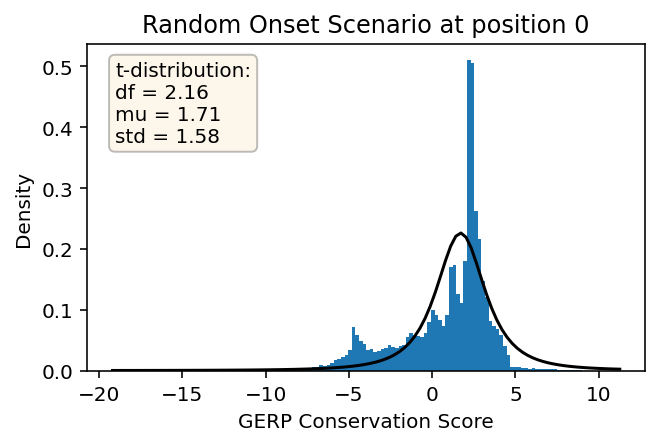

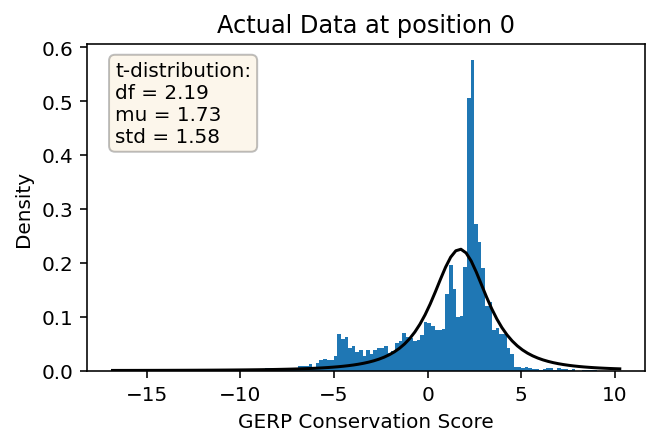

In [152]:
example_point = flank

for m, tit in zip([metag_average, metag],["Random Onset Scenario", "Actual Data"]):
    example_dist = m[:,example_point]
    example_dist = example_dist[~np.isnan(example_dist)]
    params = stats.t.fit(example_dist)
    fig, ax = plt.subplots(1,1,figsize=[5,3])
    plt.hist(example_dist, bins=128, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.t.pdf(x, *params)
    plt.plot(x, p, 'k')
    ax.text(0.05, 0.95, "t-distribution:\ndf = %.2f\nmu = %.2f\nstd = %.2f" % params, 
            transform=ax.transAxes, verticalalignment='top', horizontalalignment="left", alpha=1,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))
    plt.title(f"{tit} at position {flank - example_point}")
    plt.ylabel("Density")
    plt.xlabel("GERP Conservation Score")
    plt.show()

Non-parametric statistical analysis. There is no need to assume that our observations, or the underlying populations, are normally distributed. Thanks to the Central Limit Theorem, the resampling distribution of the effect size will approach a normality.

In [153]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[165, 302], [397, 401], [412, 422]]


In [154]:
kk = 0.95 
bootstrap_ci = confidence_interval_calculate(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_calculate(metag_average, confidence=1-((1-kk) / onset_gene))

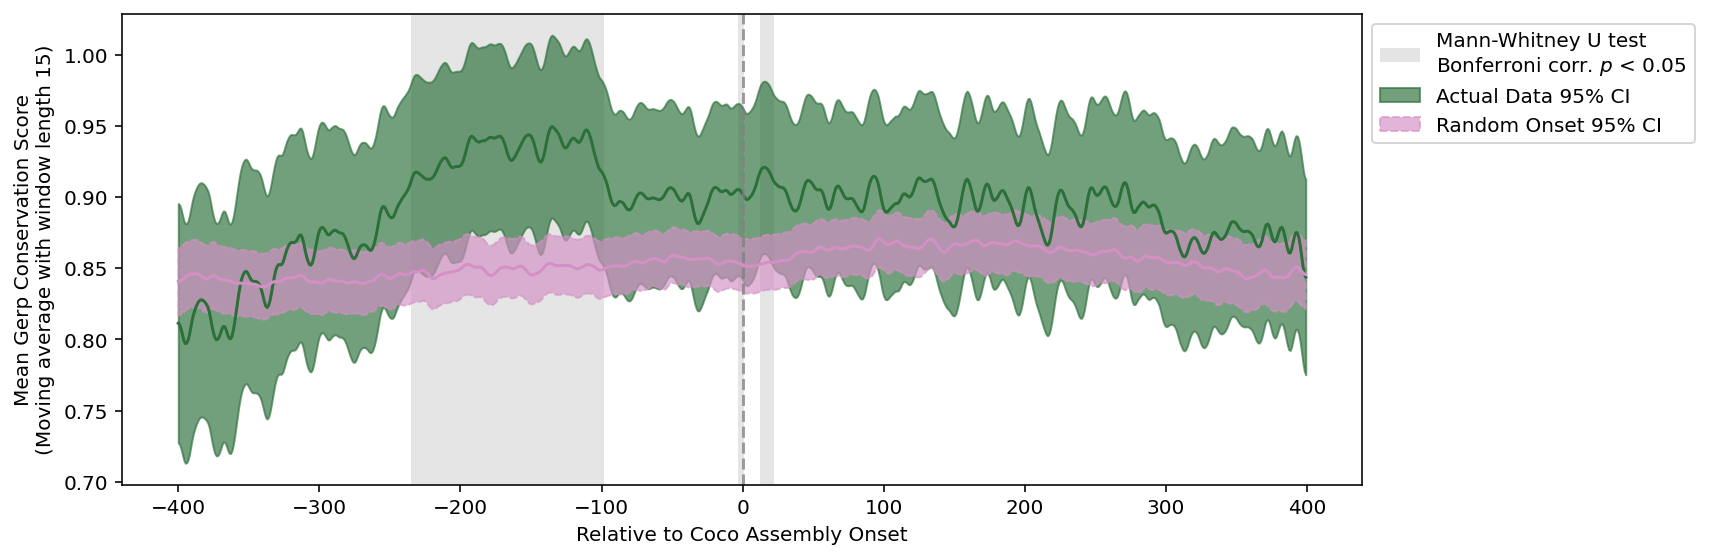

In [155]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12,4))
x_data = np.array(range(-flank, flank))

plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.66, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.66, linestyle="--", label="Random Onset 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Coco Assembly Onset")
plt.ylabel("Mean Gerp Conservation Score\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conservation around Collision Peaks

In [159]:
number_of_collisions = 0
for gene_id in gene_collision:
    number_of_collisions += len(gene_collision[gene_id])
number_of_collisions

34135

In [160]:
flank = 400
metag = np.full((number_of_collisions, flank * 2), np.nan)
ind = 0
for gene_id in gene_collision:
    gerp = gerp_dict[gene_id]
    col = gene_collision[gene_id]
    for ons in col:
        start_position = max(0, ons-flank)
        start_offset = -min(0, ons-flank)
        marr = gerp[start_position: ons+flank]
        metag[ind, start_offset: len(marr) + start_offset] = marr
        ind += 1
ind

34135

In [162]:
collison_gene = 25
flank = 400
metag_average = np.full((number_of_collisions * collison_gene, flank * 2), np.nan)
ind = 0
for gene_id in gene_collision:
    gerp = gerp_dict[gene_id]
    col = gene_collision[gene_id]
    for ons in col:
        for _ in range(collison_gene):
            ons = np.random.randint(gene_lengths[gene_id])
            start_position = max(0, ons-flank)
            start_offset = -min(0, ons-flank)
            marr = gerp[start_position: ons+flank]
            metag_average[ind, start_offset: len(marr) + start_offset] = marr
            ind += 1
ind

853375

In [163]:
m1 = np.array([smooth_array(i, 15, "hanning") for i in metag])
m2 = np.array([smooth_array(i, 15, "hanning") for i in metag_average])
significance = list()
for i in range (flank*2):
    progress_bar(i, flank*2 - 1, verbose=True)
    m1_l = m1[:,i][~np.isnan(m1[:,i])]
    m2_l = m2[:,i][~np.isnan(m2[:,i])]
    significance.append(stats.mannwhitneyu(m1_l, m2_l).pvalue < 0.05 / (flank * 2))
significance = np.array(significance).astype(int)
## Ranges for plotting
signif_rnges = list()
first_element = False
for ind, i in enumerate(significance):
    if not first_element and i == 0:
        continue
    elif not first_element and i == 1:
        first_element = ind
    elif i == 0 or ind == len(significance) - 1:
        signif_rnges.append([first_element, ind - 1])
        first_element = False
    elif i == 1:
        continue
print(signif_rnges)

Progress: |████████████████████| 100.0% 
[[357, 363], [386, 416]]


In [164]:
kk = 0.95 
bootstrap_ci = confidence_interval_calculate(metag, confidence=kk)
bootstrap_ci_random = confidence_interval_calculate(metag_average, confidence=1-((1-kk) / onset_gene))

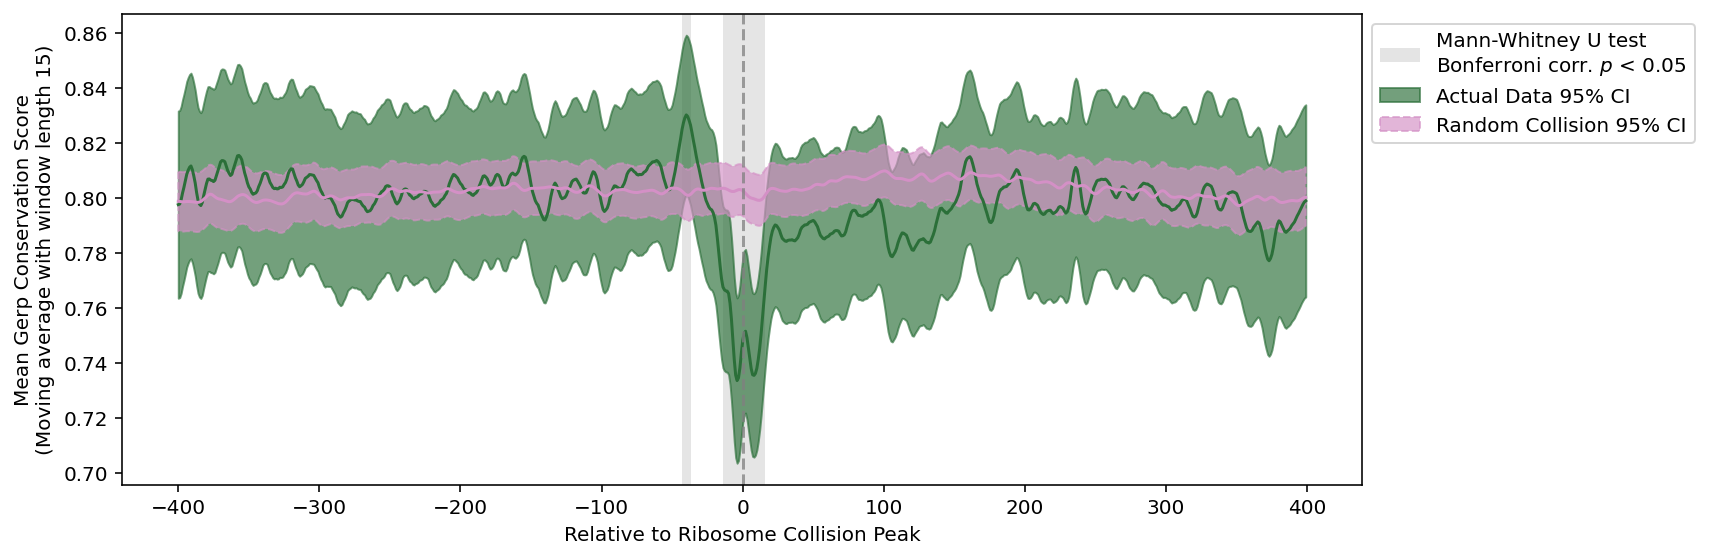

In [165]:
palette = sns.color_palette("cubehelix", 2)
plt.figure(figsize=(12, 4))
x_data = np.array(range(-flank, flank))
plt.plot(x_data, smooth_array(np.nanmean(metag, axis=0), 15, "hanning"),
                color=palette[0], alpha=1)
plt.plot(x_data, smooth_array(np.nanmean(metag_average, axis=0), 15, "hanning"),
                color=palette[1], alpha=1)
plt.fill_between(x_data, smooth_array(bootstrap_ci[0],15, "hanning"), smooth_array(bootstrap_ci[1],15, "hanning"),
                color=palette[0], alpha=0.66, label="Actual Data 95% CI")
plt.fill_between(x_data, smooth_array(bootstrap_ci_random[0],15, "hanning"), smooth_array(bootstrap_ci_random[1],15, "hanning"),
                color=palette[1], alpha=0.66, linestyle="--", label="Random Collision 95% CI")
for i_rng, rng in enumerate(signif_rnges):
    plt.axvspan(rng[0] - flank, rng[1] - flank, color="gray", alpha=0.20, zorder=0, linewidth=0,
                label="Mann-Whitney U test\nBonferroni corr. $p$ < 0.05" if i_rng == 0 else "")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Ribosome Collision Peak")
plt.ylabel("Mean Gerp Conservation Score\n(Moving average with window length 15)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conservation at ribosome collision peaks coinciding with coco onset

# .

# .

# .

# .

# .

# .

# IDEAS

# .

# .

# .

# .

# .

# .

## Streching the Coco curve

In [378]:
def get_assembl_curve(gene_id):
    sgnl = I.riboseq_coco.calculate_curve(gene_id)
    drvt = np.gradient(sgnl)
    ons = gene_onset[gene_id]
    m = drvt[ons]
    karsi = sgnl[ons] - sgnl.min()
    komsu = karsi/m * 4
    return [max(0, math.floor(ons - komsu)), min(gene_lengths[gene_id], math.ceil(ons + komsu))]

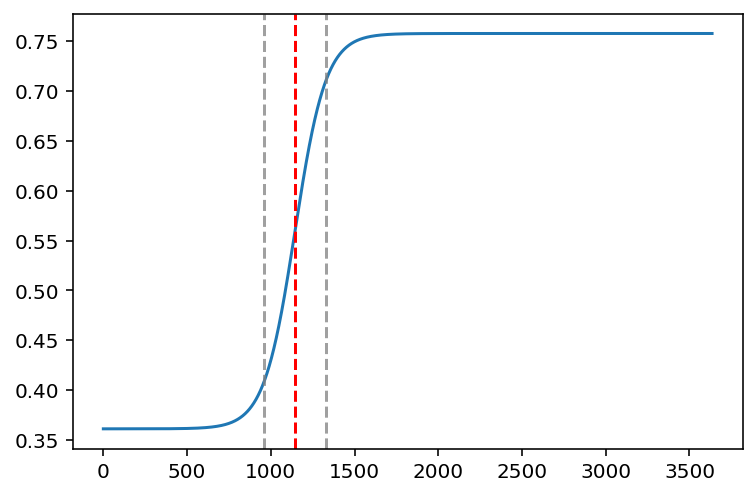

In [379]:
gene_id = "ENSG00000064651"
m1, m2 = get_assembl_curve(gene_id)
sgnl = I.riboseq_coco.calculate_curve(gene_id)
plt.plot(sgnl)
ons = gene_onset[gene_id]
plt.axvline(ons, color="red", alpha=1, linestyle = "--")
plt.axvline(m1, color="gray", alpha=0.75, linestyle = "--")
plt.axvline(m2, color="gray", alpha=0.75, linestyle = "--")
plt.show()
#I.riboseq_coco.plot_result(gene_id)

In [380]:
gene_assembl = {gene_id: get_assembl_curve(gene_id) for gene_id in gene_onset if not np.isnan(gene_onset[gene_id])}

/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1941: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1940: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \
/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1936: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init


In [381]:
import scipy.interpolate as interp
def interpolate_5000(arr, toto=5000):
    arr1_interp = interp.interp1d(np.arange(arr.size), arr, kind="linear")
    return arr1_interp(np.linspace(0, arr.size-1, toto))

In [382]:
lst = []
for gene_id in I.gene_list:
    ons = gene_onset[gene_id]
    if not np.isnan(ons):
        m1, m2 = get_assembl_curve(gene_id)    
        signl = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)[m1:m2]
        signl = signl / I.riboseq_sixtymers.background.calculate_rpm_genes(gene_id)
        lst.append(list(interpolate_5000(signl)))
lst=np.array(lst)

In [395]:
repeat=10
lst_ar=np.zeros(lst.shape) 
for _ in range(repeat):
    lst_r = []
    for gene_id in I.gene_list:
        ons = gene_onset[gene_id]
        if not np.isnan(ons):
            m1, m2 = get_assembl_curve(gene_id)    
            signl_r = np.random.choice(normalized_sixtymers_random, m2-m1)
            lst_r.append(list(interpolate_5000(signl_r))) 
    lst_ar += np.array(lst_r)
lst_ar = lst_ar / repeat

/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1941: RuntimeWarning: overflow encountered in exp
  ((1 - i_final) / (1 + np.exp(-a_2 * (x - (i_mid + i_dist)))) + i_final)
/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1940: RuntimeWarning: overflow encountered in exp
  return ((i_max - i_init) / (1 + np.exp(-a_1 * (x - i_mid))) + i_init) * \
/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure/main.py:1936: RuntimeWarning: overflow encountered in exp
  return (i_max - i_init) / (1 + np.exp(-a * (x - i_mid))) + i_init


In [403]:
repeat=5
lst_ars=np.zeros(lst.shape) 
for _ in range(repeat):
    lst_rs = []
    for gene_id in I.gene_list:
        ons = gene_onset[gene_id]
        if not np.isnan(ons):
            m1 = np.random.randint(0, gene_lengths[gene_id] / 3 * 2) 
            m2 = np.random.randint(m1+14, gene_lengths[gene_id])
            signl = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)[m1:m2]
            signl = signl / I.riboseq_sixtymers.background.calculate_rpm_genes(gene_id)
            lst_rs.append(list(interpolate_5000(signl))) 
    lst_ars += np.array(lst_rs)
lst_ars = lst_ars / repeat

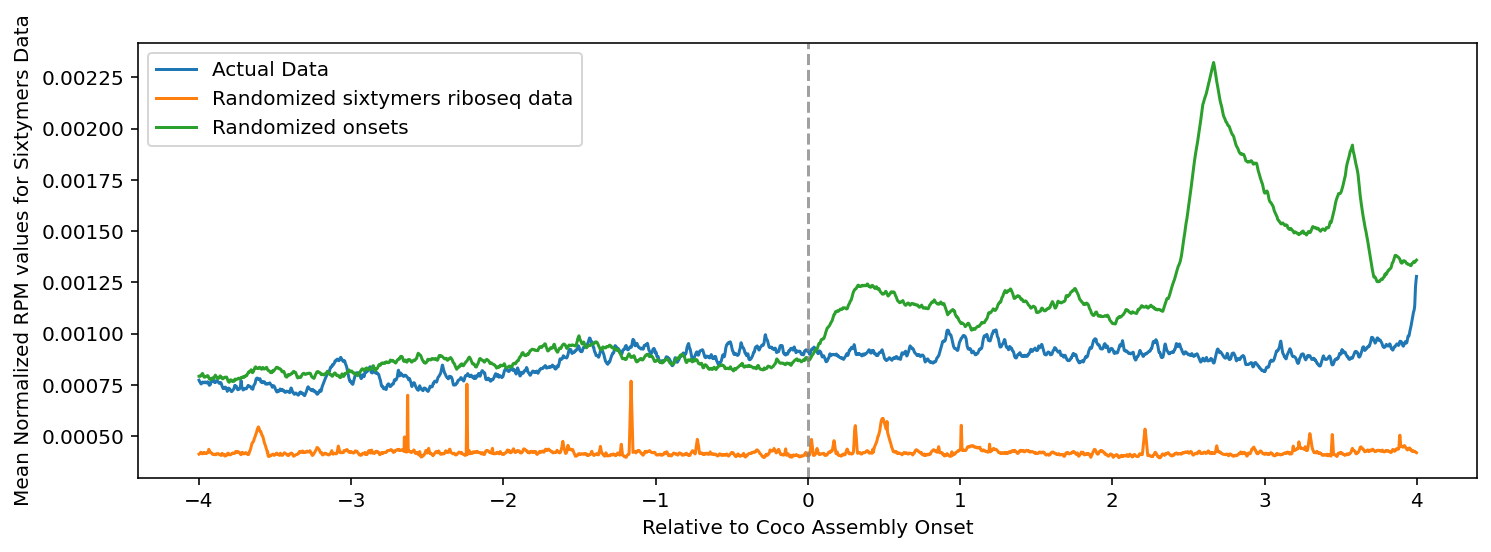

In [404]:
plt.figure(figsize=(12,4))
x_data = np.arange(-4, 4, 8/5000)
plt.plot(x_data, np.mean(lst, axis=0), label="Actual Data")
plt.plot(x_data, np.mean(lst_ar, axis=0), label="Randomized sixtymers riboseq data")
plt.plot(x_data, np.mean(lst_ars, axis=0), label="Randomized onsets")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.xlabel("Relative to Coco Assembly Onset")
plt.ylabel("Mean Normalized RPM values for Sixtymers Data")
plt.legend()
plt.show()

## Look for sequence logo everywhere

* go for the collision peaks which does not show the logo
* go for the sequence similar to logo but does not show collision peak

For example, check GERP conservation scores in and around these regions

## Investigating collision peaks on coco, the shape of the fitting?

In [10]:
m=list(associated_peaks.keys())
print(f"Number of genes involved in the Coco-Sixtymer relationship based on detected collison peaks: {len(m)}")

print(f"\nThese genes has following statistics in for RPKM ({len(m)}):")
rpkms_of_these_genes = [I.riboseq_sixtymers.background.calculate_rpkm_genes(i) for i in m]
print(f"Mean: {np.mean(rpkms_of_these_genes)}")
print(f"Std Dev: {np.std(rpkms_of_these_genes)}")
print(f"Median: {np.median(rpkms_of_these_genes)}")

print(f"\nAll Genes ({len(I.gene_list)}):")
rpkms_of_these_genes = [I.riboseq_sixtymers.background.calculate_rpkm_genes(i) for i in I.gene_list]
print(f"Mean: {np.mean(rpkms_of_these_genes)}")
print(f"Std Dev: {np.std(rpkms_of_these_genes)}")
print(f"Median: {np.median(rpkms_of_these_genes)}")

msa = [i for i in I.gene_list if not np.isnan(gene_onset[i])]
print(f"\nGenes which fited Coco ({len(msa)}):")
rpkms_of_these_genes = [I.riboseq_sixtymers.background.calculate_rpkm_genes(i) for i in msa]
print(f"Mean: {np.mean(rpkms_of_these_genes)}")
print(f"Std Dev: {np.std(rpkms_of_these_genes)}")
print(f"Median: {np.median(rpkms_of_these_genes)}")

Number of genes involved in the Coco-Sixtymer relationship based on detected collison peaks: 620

These genes has following statistics in for RPKM (620):
Mean: 163.1563404194835
Std Dev: 326.01236702475535
Median: 55.22335557456464

All Genes (22524):
Mean: 40.506679251459744
Std Dev: 155.06101207215647
Median: 1.7091719641796888

Genes which fited Coco (7796):
Mean: 107.24722428322525
Std Dev: 247.17198543924593
Median: 35.91412299221416


## K-modes clustering of ribosome collision sites

In [90]:
chem_dict = dict()
for aa, chem in (("GCTYS", "Pol"),
("DE", "Aci"),
("KHR", "Bas"),
("UX.", np.nan),
("QN", "Neu"),
("AMILVFPW", "Hyd")):
    for a in aa:
        chem_dict[a] = chem

In [91]:
coll_region = list()
fl = 20
for gene_id in gene_collision:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    protein_seq = "."*fl + I.protein_genome.db[best_transcript][1] + "."*fl
    for nt_position in gene_collision[gene_id]:
        aa_position = math.floor(nt_position / 3) + fl
        fpca = list(protein_seq[aa_position-fl: aa_position+fl])
        #fpca = [chem_dict[a] for a in fpca]
        coll_region.append(fpca)
coll_region = np.array(coll_region)

In [94]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, max_iter=100, init='cao', n_init=1, verbose=1)
clusters = km.fit_predict(coll_region)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 590835.0


# Motif Discovery Tool for Coco Onset